# Group 4 Modelling Project


# Background Information

We are external consultants hired by a local supermarket to identify target segments that have potential to increase spending in their stores. We are also tasked to come up with a marketing campaign to address any existing potential increase in spending.

# Dataset obtained

We have set out to survey the customers of the supermarket and have collected 2239 responses from our survey. 

Source: https://www.kaggle.com/imakash3011/customer-personality-analysis

Using this response, we will seek to:

(1) Clean and Define our Independent Variables (IV) and Dependant Variables (DV)

(2) Identify Patterns/Clusters/Trends 

(3) Create Models used for prediction

(4) Ideate marketing strategies and plans for our client

# 1. Define our Independent Variables (IV) and Dependant Variables (DV)

We will start off by looking at the data that we have collected

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.discrete.discrete_model import Probit
from sklearn.model_selection import train_test_split
import random
from scipy.stats import normaltest 
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing

from statsmodels.formula.api import glm
from statsmodels.formula.api import logit
from statsmodels.formula.api import probit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

import matplotlib.image as mpimg

from sklearn.cluster import DBSCAN
from numpy import unique
import matplotlib.cm as cm
from numpy import where
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

orig_df = pd.read_csv('./Cust_analysis.csv',header=0 )
print(orig_df)
print("")
print(orig_df.columns)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0    4/9/2012       58       635  ...            

From this set of data, we will want to focus on the following variables:

IV: Year_Birth, Income, Kidhome, Teenhome, Dt_Customer, Recency

DV: MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts

In [2]:
#Generating Dataset with only the above-mentioned data
useful_df = orig_df[['Year_Birth', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']]
print("This is the DF without unused Columns:")
print(useful_df.head(5))
print("\n\n")

This is the DF without unused Columns:
   Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  \
0        1957  58138.0        0         0    4/9/2012       58       635   
1        1954  46344.0        1         1    8/3/2014       38        11   
2        1965  71613.0        0         0   21/8/2013       26       426   
3        1984  26646.0        1         0   10/2/2014       26        11   
4        1981  58293.0        1         0   19/1/2014       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  
0         88              546              172                88  
1          1                6                2                 1  
2         49              127              111                21  
3          4               20               10                 3  
4         43              118               46                27  





# Cleaning of Independent and Dependent Variables

In [3]:
# check for missing values 
print(useful_df.isnull().sum())
print('------------------------------------')

Year_Birth           0
Income              24
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
dtype: int64
------------------------------------


In [4]:
#Removal of Null values from Income
useful_df = useful_df.dropna()
print(useful_df.isnull().sum())
useful_df = useful_df.reset_index(drop=True)
print(useful_df.shape)

Year_Birth          0
Income              0
Kidhome             0
Teenhome            0
Dt_Customer         0
Recency             0
MntWines            0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
MntSweetProducts    0
dtype: int64
(2216, 11)


In [5]:
#Removal of Data where any DV = 0
no_zero_df = useful_df[useful_df.MntWines > 1]
print("This is the shape after removal of 0 Wine spendings ", no_zero_df.shape)
no_zero_df = no_zero_df[no_zero_df.MntFruits > 1]
print("This is the shape after removal of 0 Fruit spendings ", no_zero_df.shape)
no_zero_df = no_zero_df[no_zero_df.MntMeatProducts > 1]
print("This is the shape after removal of 0 Meat spendings ", no_zero_df.shape)
no_zero_df = no_zero_df[no_zero_df.MntFishProducts > 1]
print("This is the shape after removal of 0 Fish spendings ", no_zero_df.shape)
no_zero_df = no_zero_df[no_zero_df.MntSweetProducts > 1]
no_zero_df = no_zero_df.reset_index(drop=True)
print("This is the shape after removal of 0 Sweets spendings ", no_zero_df.shape)
no_zero_df = no_zero_df[no_zero_df.Year_Birth > 1920]
no_zero_df = no_zero_df[no_zero_df.Income < 140000]
print("This is the shape after removal of other rubbish input ", no_zero_df.shape)
print("\n\n", no_zero_df.head(5))

This is the shape after removal of 0 Wine spendings  (2166, 11)
This is the shape after removal of 0 Fruit spendings  (1627, 11)
This is the shape after removal of 0 Meat spendings  (1624, 11)
This is the shape after removal of 0 Fish spendings  (1477, 11)
This is the shape after removal of 0 Sweets spendings  (1285, 11)
This is the shape after removal of other rubbish input  (1282, 11)


    Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  \
0        1957  58138.0        0         0    4/9/2012       58       635   
1        1965  71613.0        0         0   21/8/2013       26       426   
2        1984  26646.0        1         0   10/2/2014       26        11   
3        1981  58293.0        1         0   19/1/2014       94       173   
4        1971  55635.0        0         1  13/11/2012       34       235   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  
0         88              546              172                88  
1         49    

# Re-formatting IV

Here we will look at the 5 Existing IV and Reformat them for easier usage.

In [6]:
#Converting Year of Birth to a numerical Age
no_zero_df['Age'] = 2021 - no_zero_df['Year_Birth']

#Add number of Teens and number of Kids to become Number of Dependents
no_zero_df['Dependents'] = no_zero_df['Kidhome'] + no_zero_df['Teenhome']

#Calculating number of days since customer registered
from datetime import date
from datetime import datetime

no_zero_df['Days_Regis'] = ""
num_of_days = []

for index, row in no_zero_df.iterrows():
    d1 = datetime.strptime('23/8/2021', '%d/%m/%Y') 
    d2 = datetime.strptime(row['Dt_Customer'], '%d/%m/%Y')
    difference = d1-d2
    num_of_days.append(difference.days)
    
no_zero_df['Days_Regis'] = num_of_days

print(no_zero_df.head(5))

   Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  \
0        1957  58138.0        0         0    4/9/2012       58       635   
1        1965  71613.0        0         0   21/8/2013       26       426   
2        1984  26646.0        1         0   10/2/2014       26        11   
3        1981  58293.0        1         0   19/1/2014       94       173   
4        1971  55635.0        0         1  13/11/2012       34       235   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  Age  \
0         88              546              172                88   64   
1         49              127              111                21   56   
2          4               20               10                 3   37   
3         43              118               46                27   40   
4         65              164               50                49   50   

   Dependents  Days_Regis  
0           0        3275  
1           0        2924  
2           1       

In [7]:
#Convert to Reformatted DF
reformat_df = no_zero_df[['Age', 'Income', 'Dependents', 'Days_Regis', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']]
print(reformat_df.head(3))
print("\n\nThis is the shape of the reformatted df ", reformat_df.shape)

   Age   Income  Dependents  Days_Regis  Recency  MntWines  MntFruits  \
0   64  58138.0           0        3275       58       635         88   
1   56  71613.0           0        2924       26       426         49   
2   37  26646.0           1        2751       26        11          4   

   MntMeatProducts  MntFishProducts  MntSweetProducts  
0              546              172                88  
1              127              111                21  
2               20               10                 3  


This is the shape of the reformatted df  (1282, 10)


# Defining DV

Here we will look at the 5 Existing DV and Test for Correlation between each of the DV.

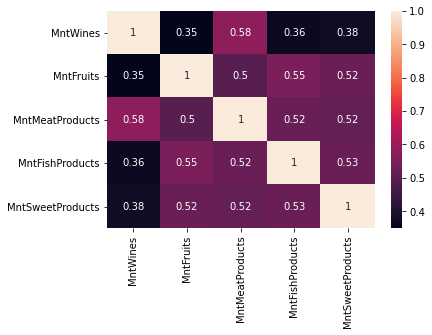

In [8]:
# Testing for Correlation between all DV
dv_df = reformat_df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']]

corrMatrix = dv_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()   

From this Correlation Test, we see that ALL products are positively correlated. Since the correlation values are in the low to mid-range, it also means that generally higher-spenders may have preferences in certain basket of goods, but they will also tend to spend on products not in their preferred basket. Similarly, low-spenders will spend lower across the board as well.

For DV that we will want to look at, we will look at
- Wines - the product that seems to be least related to all other products may require a specific marketing campaign on its own
- Fruits/Fish/Sweets - the products with similar correlations with each other

# 2. EDA for All IV against DV

We will now explore all IV and DV to see if there are any trends or clusters forming - which may give us a better hint for a suitable model.

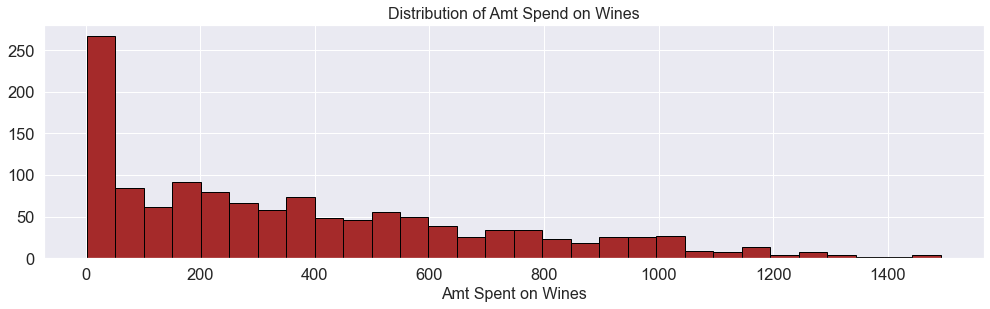

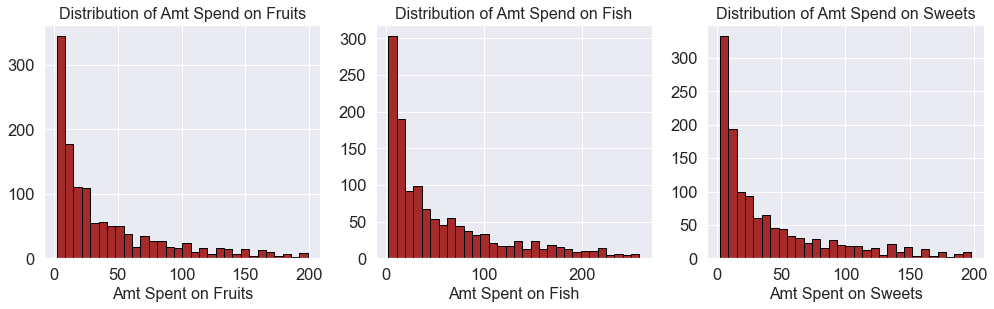

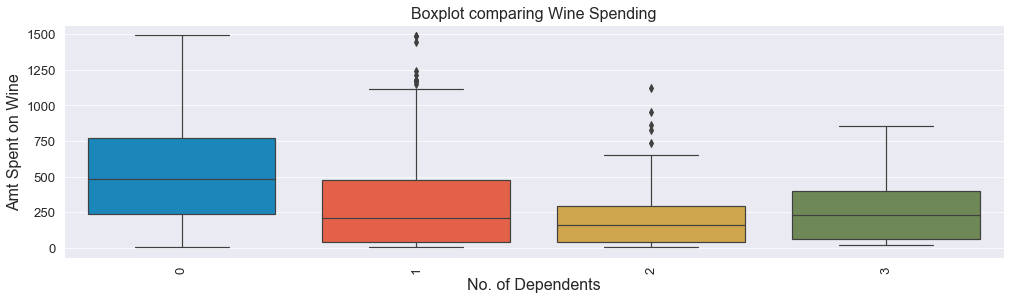

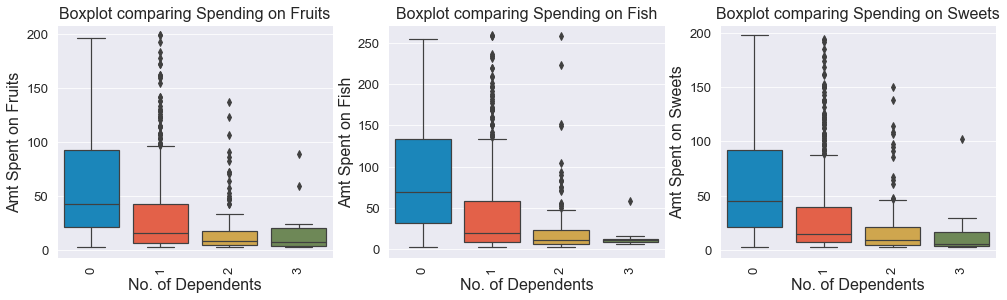

In [9]:
# histogram for Wines
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,4]
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

plt.hist(reformat_df['MntWines'], color='Brown', edgecolor='black', bins = 30) 
plt.title('Distribution of Amt Spend on Wines')
plt.xlabel('Amt Spent on Wines')
plt.show()



# histogram for Fruits/Fish/Sweets

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,4]
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

plt.subplot(1, 3, 1)
plt.hist(reformat_df['MntFruits'], color='Brown', edgecolor='black', bins = 30) 
plt.title('Distribution of Amt Spend on Fruits')
plt.xlabel('Amt Spent on Fruits')

plt.subplot(1, 3, 2)
plt.hist(reformat_df['MntFishProducts'], color='Brown', edgecolor='black', bins = 30) 
plt.title('Distribution of Amt Spend on Fish')
plt.xlabel('Amt Spent on Fish')

plt.subplot(1, 3, 3)
plt.hist(reformat_df['MntSweetProducts'], color='Brown', edgecolor='black', bins = 30) 
plt.title('Distribution of Amt Spend on Sweets')
plt.xlabel('Amt Spent on Sweets')

plt.show()




#Boxplot
sns.set_context("paper", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
plt.title('Boxplot comparing Wine Spending')
sns.boxplot(x='Dependents', y='MntWines', data=reformat_df)
plt.xlabel('No. of Dependents')
plt.ylabel('Amt Spent on Wine')
plt.xticks(rotation=90)
plt.show()



#Boxplot
sns.set_context("paper", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

plt.subplot(1, 3, 1)
plt.title('Boxplot comparing Spending on Fruits')
sns.boxplot(x='Dependents', y='MntFruits', data=reformat_df)
plt.xlabel('No. of Dependents')
plt.ylabel('Amt Spent on Fruits')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.title('Boxplot comparing Spending on Fish')
sns.boxplot(x='Dependents', y='MntFishProducts', data=reformat_df)
plt.xlabel('No. of Dependents')
plt.ylabel('Amt Spent on Fish')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.title('Boxplot comparing Spending on Sweets')
sns.boxplot(x='Dependents', y='MntSweetProducts', data=reformat_df)
plt.xlabel('No. of Dependents')
plt.ylabel('Amt Spent on Sweets')
plt.xticks(rotation=90)


plt.show()


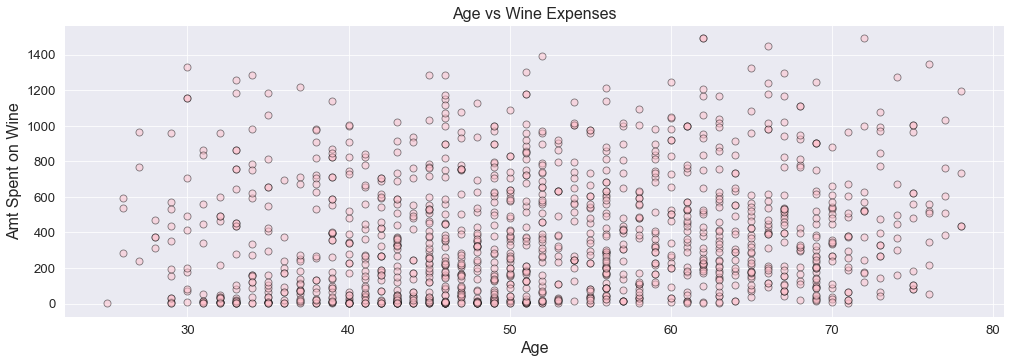

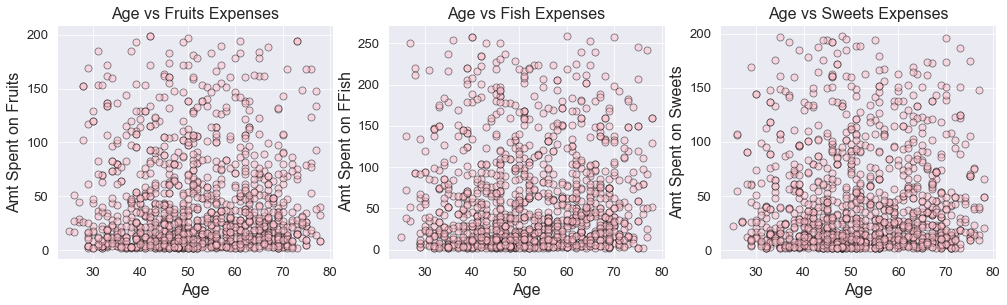

In [10]:
#Scatterplot
plt.subplots(figsize=(15,5)) 
plt.scatter(reformat_df['Age'],reformat_df['MntWines'], s = 50, edgecolor = 'black', alpha = 0.5, color ='pink')

plt.title("Age vs Wine Expenses")
plt.xlabel('Age')
plt.ylabel('Amt Spent on Wine') 
plt.show()



#Scatterplot
plt.subplot(1, 3, 1) 
plt.scatter(reformat_df['Age'],reformat_df['MntFruits'], s = 50, edgecolor = 'black', alpha = 0.5, color ='pink')

plt.title("Age vs Fruits Expenses")
plt.xlabel('Age')
plt.ylabel('Amt Spent on Fruits') 


plt.subplot(1, 3, 2) 
plt.scatter(reformat_df['Age'],reformat_df['MntFishProducts'], s = 50, edgecolor = 'black', alpha = 0.5, color ='pink')

plt.title("Age vs Fish Expenses")
plt.xlabel('Age')
plt.ylabel('Amt Spent on FFish') 


plt.subplot(1, 3, 3) 
plt.scatter(reformat_df['Age'],reformat_df['MntSweetProducts'], s = 50, edgecolor = 'black', alpha = 0.5, color ='pink')

plt.title("Age vs Sweets Expenses")
plt.xlabel('Age')
plt.ylabel('Amt Spent on Sweets') 


plt.show()




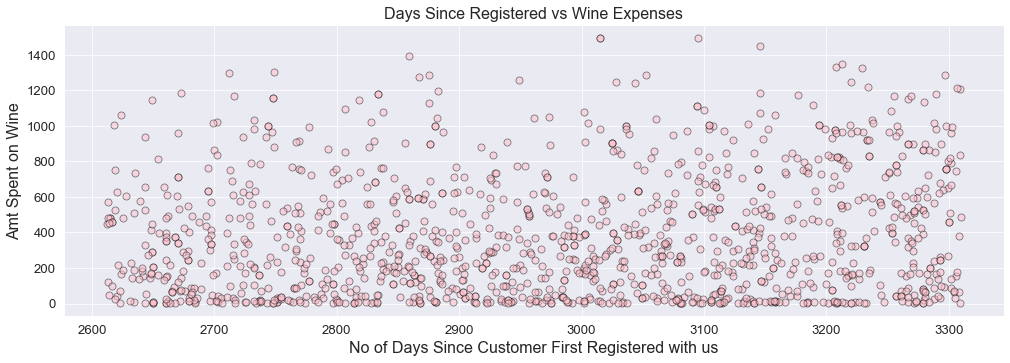

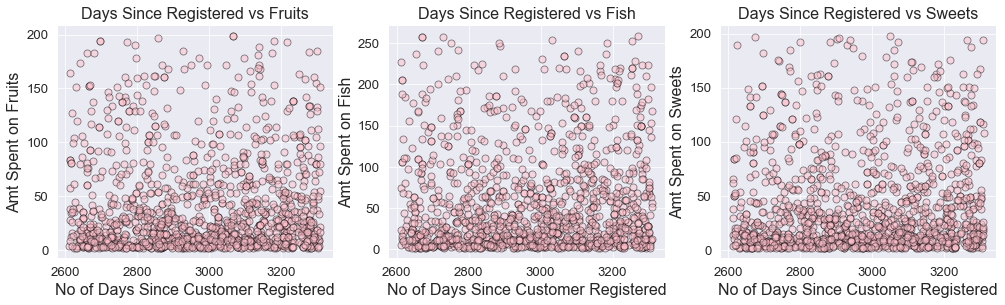

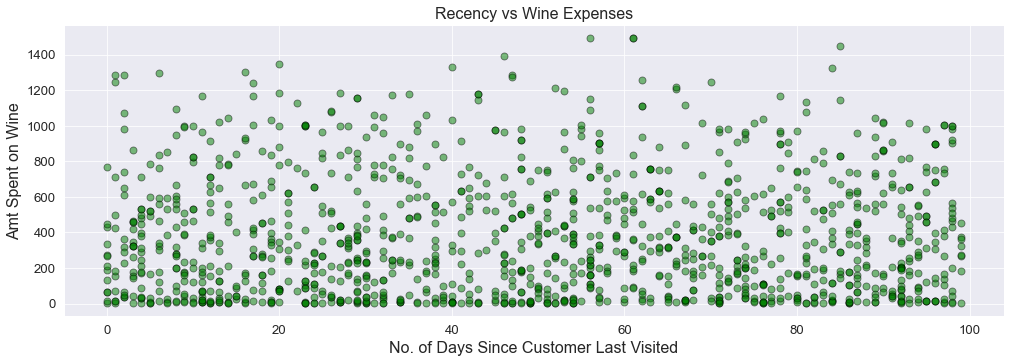

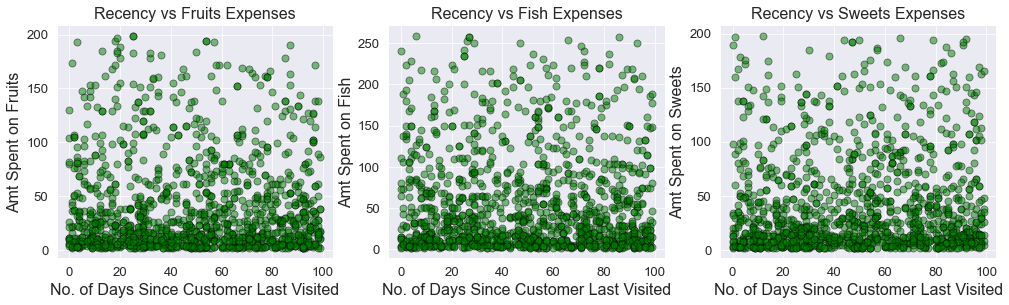

In [11]:
#Scatterplot
plt.subplots(figsize=(15,5)) 
plt.scatter(reformat_df['Days_Regis'],reformat_df['MntWines'], s = 50, edgecolor = 'black', alpha = 0.5, color ='pink')

plt.title("Days Since Registered vs Wine Expenses")
plt.xlabel('No of Days Since Customer First Registered with us')
plt.ylabel('Amt Spent on Wine') 
plt.show()



#Scatterplot for Days Since Registered
plt.subplot(1, 3, 1) 
plt.scatter(reformat_df['Days_Regis'],reformat_df['MntFruits'], s = 50, edgecolor = 'black', alpha = 0.5, color ='pink')

plt.title("Days Since Registered vs Fruits")
plt.xlabel('No of Days Since Customer Registered')
plt.ylabel('Amt Spent on Fruits') 

plt.subplot(1, 3, 2) 
plt.scatter(reformat_df['Days_Regis'],reformat_df['MntFishProducts'], s = 50, edgecolor = 'black', alpha = 0.5, color ='pink')

plt.title("Days Since Registered vs Fish")
plt.xlabel('No of Days Since Customer Registered')
plt.ylabel('Amt Spent on Fish') 

plt.subplot(1, 3, 3) 
plt.scatter(reformat_df['Days_Regis'],reformat_df['MntSweetProducts'], s = 50, edgecolor = 'black', alpha = 0.5, color ='pink')

plt.title("Days Since Registered vs Sweets")
plt.xlabel('No of Days Since Customer Registered')
plt.ylabel('Amt Spent on Sweets') 

plt.show()



#Scatterplot
plt.subplots(figsize=(15,5)) 
plt.scatter(reformat_df['Recency'],reformat_df['MntWines'], s = 50, edgecolor = 'black', alpha = 0.5, color ='green')

plt.title("Recency vs Wine Expenses")
plt.xlabel('No. of Days Since Customer Last Visited')
plt.ylabel('Amt Spent on Wine') 
plt.show()



#Scatterplot for Days since Customer Last Visit
plt.subplot(1, 3, 1) 
plt.scatter(reformat_df['Recency'],reformat_df['MntFruits'], s = 50, edgecolor = 'black', alpha = 0.5, color ='green')

plt.title("Recency vs Fruits Expenses")
plt.xlabel('No. of Days Since Customer Last Visited')
plt.ylabel('Amt Spent on Fruits') 


plt.subplot(1, 3, 2) 
plt.scatter(reformat_df['Recency'],reformat_df['MntFishProducts'], s = 50, edgecolor = 'black', alpha = 0.5, color ='green')

plt.title("Recency vs Fish Expenses")
plt.xlabel('No. of Days Since Customer Last Visited')
plt.ylabel('Amt Spent on Fish') 


plt.subplot(1, 3, 3) 
plt.scatter(reformat_df['Recency'],reformat_df['MntSweetProducts'], s = 50, edgecolor = 'black', alpha = 0.5, color ='green')

plt.title("Recency vs Sweets Expenses")
plt.xlabel('No. of Days Since Customer Last Visited')
plt.ylabel('Amt Spent on Sweets') 

plt.show()


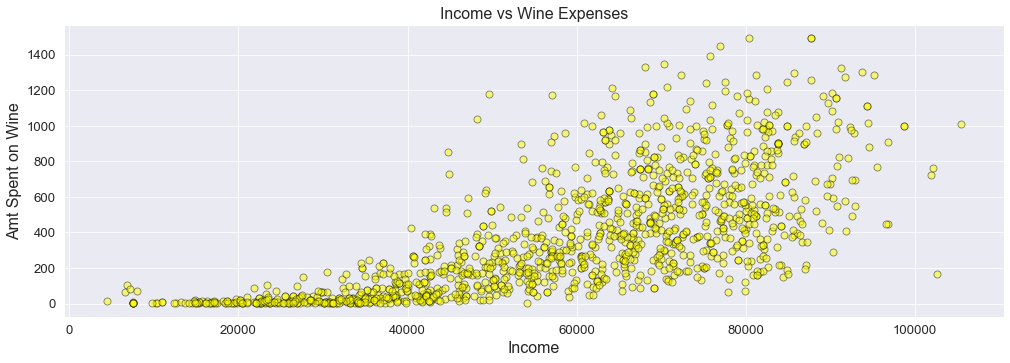

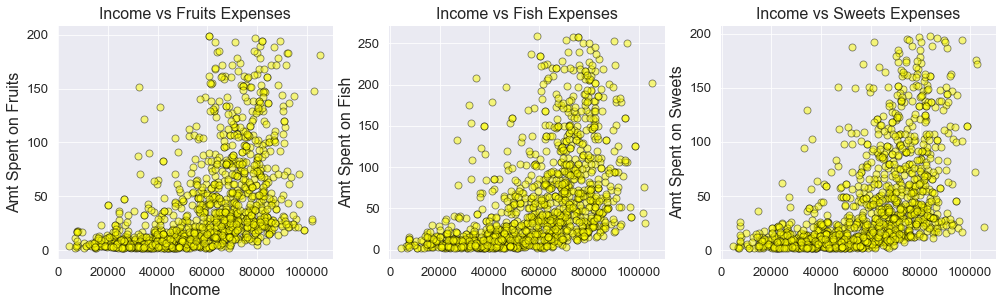

In [12]:
#Scatterplot
plt.subplots(figsize=(15,5)) 
plt.scatter(reformat_df['Income'],reformat_df['MntWines'], s = 50, edgecolor = 'black', alpha = 0.5, color ='yellow')

plt.title("Income vs Wine Expenses")
plt.xlabel('Income')
plt.ylabel('Amt Spent on Wine') 
plt.show()

#Scatterplot
plt.subplot(1, 3, 1) 
plt.scatter(reformat_df['Income'],reformat_df['MntFruits'], s = 50, edgecolor = 'black', alpha = 0.5, color ='yellow')
plt.title("Income vs Fruits Expenses")
plt.xlabel('Income')
plt.ylabel('Amt Spent on Fruits') 

plt.subplot(1, 3, 2) 
plt.scatter(reformat_df['Income'],reformat_df['MntFishProducts'], s = 50, edgecolor = 'black', alpha = 0.5, color ='yellow')
plt.title("Income vs Fish Expenses")
plt.xlabel('Income')
plt.ylabel('Amt Spent on Fish') 


plt.subplot(1, 3, 3) 
plt.scatter(reformat_df['Income'],reformat_df['MntSweetProducts'], s = 50, edgecolor = 'black', alpha = 0.5, color ='yellow')
plt.title("Income vs Sweets Expenses")
plt.xlabel('Income')
plt.ylabel('Amt Spent on Sweets') 



plt.show()

Similar to Wine, we can see that dependents and income are the main factors for difference in Expenses across all categories. There are also some small clusters forming in the Age Scatterplot.

# Feature Selection

To confirm our visual observations, we will also use Feature Selection to provide more insights to important features (IV) that may affect our DV.

In [13]:
# Feature Selection with Univariate Statistical Tests

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier

def feat_sel(DV):
    feat_select_Fruits = reformat_df[['Age', 'Income', 'Dependents', 'Days_Regis', 'Recency', DV]]

    array = feat_select_Fruits.values
    X = array[:,0:5]
    Y = array[:,5]
    # feature extraction
    test = SelectKBest(score_func=f_classif, k=4)
    fit = test.fit(X, Y)
    # summarize scores
    set_printoptions(precision=3)
    print("Scores of Each individual IV to Predict", DV, "with Univariate Feature Selection:")
    print(fit.scores_)

    #Using Feature Importance to Score
    model = ExtraTreesClassifier(n_estimators=10)
    model.fit(X, Y)
    print("\nScore of Each Individual IV to Predict", DV, "with Feature Importance Selection Method:")
    print(model.feature_importances_)

In [14]:
feat_sel('MntWines')

Scores of Each individual IV to Predict MntWines with Univariate Feature Selection:
[1.607 6.704 1.565 1.256 1.261]

Score of Each Individual IV to Predict MntWines with Feature Importance Selection Method:
[0.221 0.255 0.048 0.243 0.233]


In [15]:
feat_sel('MntFruits')

Scores of Each individual IV to Predict MntFruits with Univariate Feature Selection:
[1.327 7.829 2.914 1.423 1.185]

Score of Each Individual IV to Predict MntFruits with Feature Importance Selection Method:
[0.222 0.264 0.03  0.246 0.238]


In [16]:
feat_sel('MntFishProducts')

Scores of Each individual IV to Predict MntFishProducts with Univariate Feature Selection:
[1.347 7.279 3.148 1.213 1.301]

Score of Each Individual IV to Predict MntFishProducts with Feature Importance Selection Method:
[0.225 0.262 0.038 0.247 0.229]


In [17]:
feat_sel('MntSweetProducts')

Scores of Each individual IV to Predict MntSweetProducts with Univariate Feature Selection:
[1.494 6.691 2.787 1.157 1.381]

Score of Each Individual IV to Predict MntSweetProducts with Feature Importance Selection Method:
[0.222 0.256 0.035 0.249 0.239]


For all 4 products, Selection by Feature Importance gave results that are too close to each other. Hence, looking at Univariate Feature Selection may provide more insights.

Similar to expectations from the EDA, for all products, Income and No. of Dependents are the main features, however, Age and Days Registered seem to have some usefulness as well.

We will now move into the next phase of preparing for our models. We will be using a Linear/Polynomial Regression for Wines and Clustering + Logistic Regression for the remaining 3 Products (Fruits/Fish/Sweets).

# 3. Modelling for Wines

# Transformation & Normalisation

In [18]:
def normality_check(data):
    
    # boxplot
    plt.figure(figsize=(12,2))
    sns.boxplot(x = data, orient = 'h')
    
    # normal test
    stat, p = normaltest(data)       
    
    print('stat=%.2f, p=%.2f' % (stat, p))
    
    alpha = 0.05
    
    if p > alpha:
        print('Approximately Normally Distributed')
    else:
        print('Not Approximately Normally Distributed')

In [19]:
def more_norm_test(data):
    
    # Shapiro test (set sample size to 3000)
    if data.shape[0] > 5000:
        stat, p = shapiro(random.sample(list(data), k=3000))
    else:
        stat, p = shapiro(data)
    print('Shapiro test result: \n')
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject the null hypothesis)')
    else:
        print('Sample does not look Gaussian (reject the null hypothesis)')
        
    print('--------------------------------------------------')
    
    # Anderson-Darling test
    result = anderson(data)
    print('Anderson-Darling test result: \n')
    print('Statistic: %.3f' % result.statistic)
    p = 0.05
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            
    print('--------------------------------------------------')
    
    # Skewness & Kurtosis Statistics
    print('Skewness is {0} and Kurtosis is {1}'.format(stats.skew(data), stats.kurtosis(data, fisher=False)))

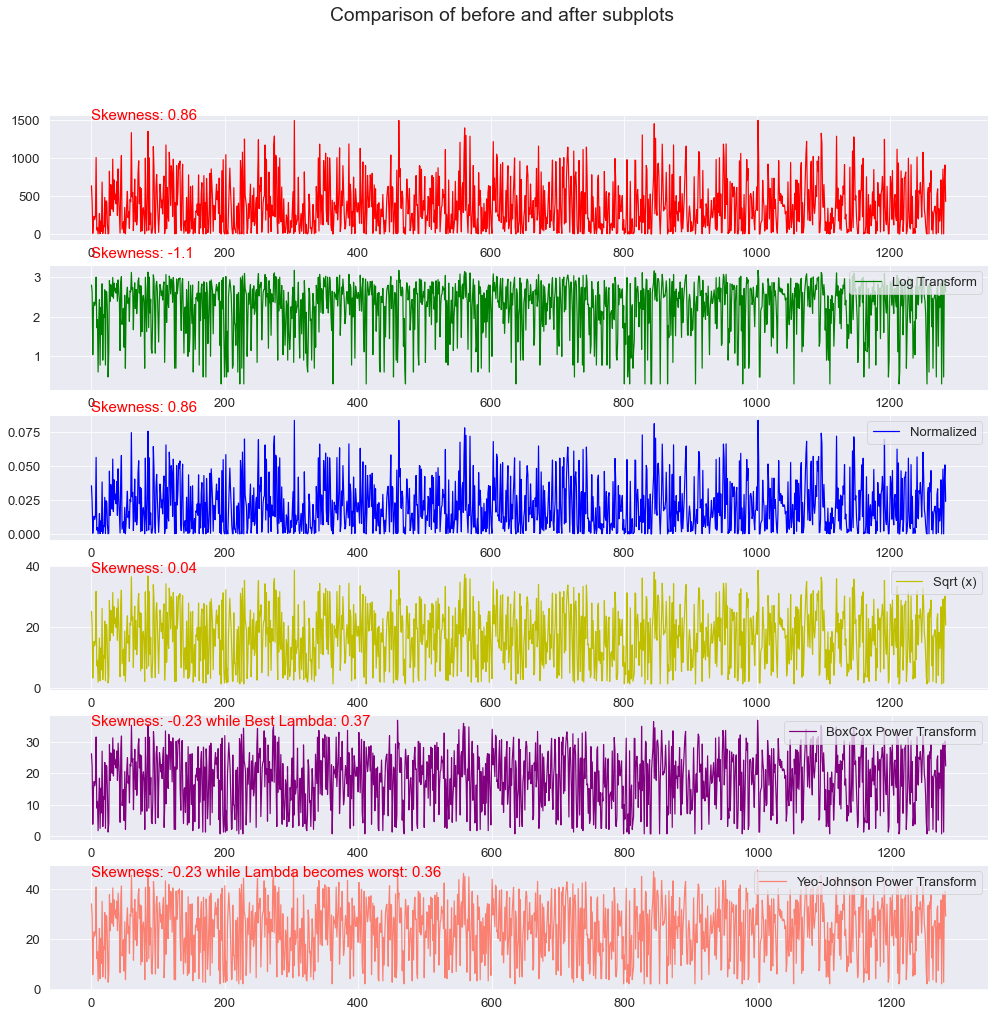

In [20]:
Wine_b4_transform = dv_df["MntWines"]

skew_b4 = np.round(Wine_b4_transform.skew(),2)

###############################################################################
##By Log10##
log_wine = np.log10(Wine_b4_transform)

skew_after_log = np.round(log_wine.skew(),2)

###############################################################################
##By Normalisation##
normalized_Wine = (Wine_b4_transform) / np.linalg.norm((Wine_b4_transform + 1e-17),axis=0)

skew_after_normalised = np.round(normalized_Wine.skew(),2)

###############################################################################
##By SQRT##
sqrtx_Wine = np.sqrt(Wine_b4_transform)

skew_after_sqrt = np.round(sqrtx_Wine.skew(),2)

###############################################################################
##Box-Cox###  
from scipy.stats import boxcox
from scipy.stats import skew

box_cox, best_Lambda_maxlog = boxcox(Wine_b4_transform)

skew_after_boxcox = np.round(skew(box_cox),2)

###############################################################################
##Yeo-Johnson###
from scipy.stats import yeojohnson
from scipy.stats import skew

yeo_John, best_Lambda_Yeo_John = yeojohnson(Wine_b4_transform * 2)

skew_after_yeoJohn = np.round(skew(yeo_John),2) + 0.00000000000000001

###############################################################################
fig, axs = plt.subplots(6,1,figsize=(15,15))
fig.suptitle('Comparison of before and after subplots')

style = dict(size=15, color='red')


axs[0].plot(Wine_b4_transform, color='r',label="Original")
axs[0].text(0, 1500, "Skewness: " + str(skew_b4), **style)
# axs[0].legend(loc="upper right")

axs[1].plot(log_wine, color='g', label="Log Transform")
axs[1].text(0, 3.5, "Skewness: " + str(skew_after_log), **style)
axs[1].legend(loc="upper right")

axs[2].plot(normalized_Wine, color='b', label="Normalized")
axs[2].text(0, 0.09, "Skewness: " + str(skew_after_normalised), **style)
axs[2].legend(loc="upper right")

axs[3].plot(sqrtx_Wine, color='y', label="Sqrt (x)")
axs[3].text(0, 38, "Skewness: " + str(skew_after_sqrt), **style)
axs[3].legend(loc="upper right")

axs[4].plot(box_cox, color='purple', label="BoxCox Power Transform")
axs[4].text(0, 35, "Skewness: " + str(skew_after_boxcox) + " while Best Lambda: " + str((np.round(best_Lambda_maxlog,2))) , **style)
axs[4].legend(loc="upper right")

axs[5].plot(yeo_John, color='salmon', label="Yeo-Johnson Power Transform")
axs[5].text(0, 45, "Skewness: " + str(skew_after_yeoJohn) + " while Lambda becomes worst: " + str((np.round(best_Lambda_Yeo_John,2))) , **style)
axs[5].legend(loc="upper right")

plt.show()

In [21]:
sqrtx_rating = np.sqrt(dv_df)
sqrtx_rating

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts
0     25.199206   9.380832        23.366643        13.114877          9.380832
1     20.639767   7.000000        11.269428        10.535654          4.582576
2      3.316625   2.000000         4.472136         3.162278          1.732051
3     13.152946   6.557439        10.862780         6.782330          5.196152
4     15.329710   8.062258        12.806248         7.071068          7.000000
...         ...        ...              ...              ...               ...
1280  29.206164   3.162278        11.958261         3.605551          3.162278
1281   1.732051   1.732051         2.645751         2.449490          1.414214
1282  26.627054   6.557439        13.490738         6.480741         10.862780
1283  30.133038   6.928203        14.730920         5.656854          3.464102
1284  20.688161   5.477226        14.628739         8.944272          5.477226

[1282 rows x 5 columns]

## Removal of Outliers for Sqrt Transformation data and testing of Normality

stat=252.57, p=0.00
Not Approximately Normally Distributed


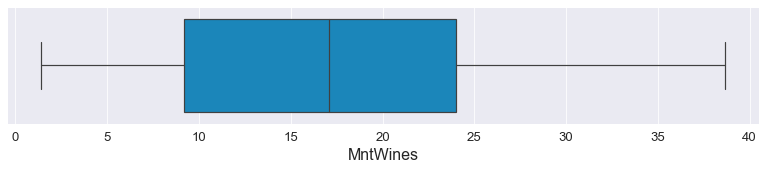

In [22]:
normality_check(sqrtx_rating["MntWines"])

The 1st Quartile: 9.178749656756981
The 3rd Quartile: 24.0
The IQR (50% between 1st to 3rd QR): 14.821250343243019
The Lower Whisker is : -13.053125858107546 and Upper Whisker is 46.23187551486453
stat=252.57, p=0.00
Not Approximately Normally Distributed
Shapiro test result: 

Statistics=0.968, p=0.000
Sample does not look Gaussian (reject the null hypothesis)
--------------------------------------------------
Anderson-Darling test result: 

Statistic: 8.768
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)
--------------------------------------------------
Skewness is 0.0395725923186206 and Kurtosis is 2.018870530084827


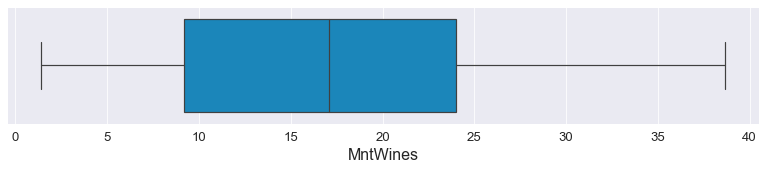

In [23]:
Q1 = sqrtx_rating.MntWines.quantile(0.25)
Q3 = sqrtx_rating.MntWines.quantile(0.75)
IQR = Q3-Q1
print('The 1st Quartile:', Q1)
print('The 3rd Quartile:', Q3)
print('The IQR (50% between 1st to 3rd QR):', IQR)

Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print('The Lower Whisker is : {} and Upper Whisker is {}'.format(Lower_Whisker, Upper_Whisker))

outlier2 = sqrtx_rating[sqrtx_rating.MntWines < Upper_Whisker]
outlier3 = outlier2[sqrtx_rating.MntWines > Lower_Whisker]
normality_check(outlier3.MntWines)
more_norm_test(outlier3.MntWines)

After Sqrt transformation and Outlier removal, distribution is still not normal. We will try using other transformation methods below.

## Transformation using Boxcox and Yeo Johnson Method

stat=222.52, p=0.00
Not Approximately Normally Distributed
stat=230.72, p=0.00
Not Approximately Normally Distributed


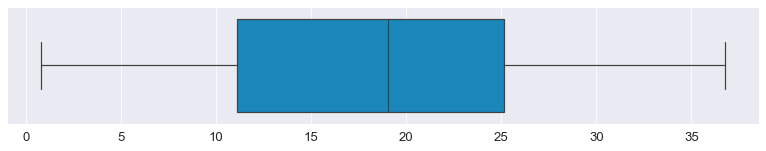

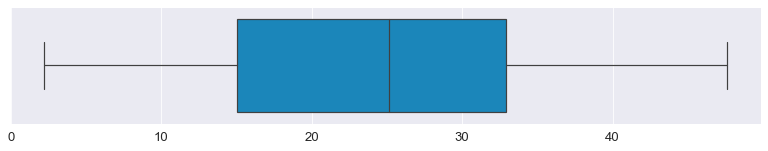

In [24]:
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy.stats import skew

normality_check(box_cox)
# more_norm_test(box_cox)
normality_check(yeo_John)
# more_norm_test(yeo_John)

### As Transformed data  is still not normal, we will revert to original Wine Purchase prices before sqrt transformation (de-transformed). 

# 5. Regression

## 5.1 Multiple Linear Regression
> IV: Income, Dependents

> DV: Wine

In [25]:
reformat_df

Age   Income  Dependents  Days_Regis  Recency  MntWines  MntFruits  \
0      64  58138.0           0        3275       58       635         88   
1      56  71613.0           0        2924       26       426         49   
2      37  26646.0           1        2751       26        11          4   
3      40  58293.0           1        2773       94       173         43   
4      50  55635.0           1        3205       34       235         65   
...   ...      ...         ...         ...      ...       ...        ...   
1280   51  44802.0           0        3289       71       853         10   
1281   47  34421.0           1        2975       81         3          3   
1282   54  61223.0           1        2993       46       709         43   
1283   40  56981.0           0        2767       91       908         48   
1284   65  69245.0           1        2768        8       428         30   

      MntMeatProducts  MntFishProducts  MntSweetProducts  
0                 546              172                88  
1                 127              111                21  
2                  20               10                 3  
3                 118               46                27  
4                 164               50                49  
...               ...              ...               ...  
1280              143               13                10  
1281                7                6                 2  
1282              182               42               118  
1283              217               32                12  
1284              214               80                30  

[1282 rows x 10 columns]

In [26]:
from sklearn.linear_model import LinearRegression

X1 = reformat_df[['Income', 'Dependents']]
y1 = reformat_df['MntWines']

reg = LinearRegression().fit(X1,y1)
print('intercept:', reg.intercept_)
print('slope:', reg.coef_)  

intercept: -224.57542317500258
slope: [ 1.088e-02 -4.045e+01]


<div align="center"> $\hat{y} = -224.57542317500258 + 0.01088X_{1} - 40.45X_{2}$ </div>

In [27]:
reformat_df["Income"].describe()

count      1282.000000
mean      57768.616225
std       20701.654884
min        4428.000000
25%       42169.500000
50%       61281.000000
75%       74183.750000
max      105471.000000
Name: Income, dtype: float64

In [28]:
reformat_df["Dependents"].describe()

count    1282.000000
mean        0.748830
std         0.701912
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Dependents, dtype: float64

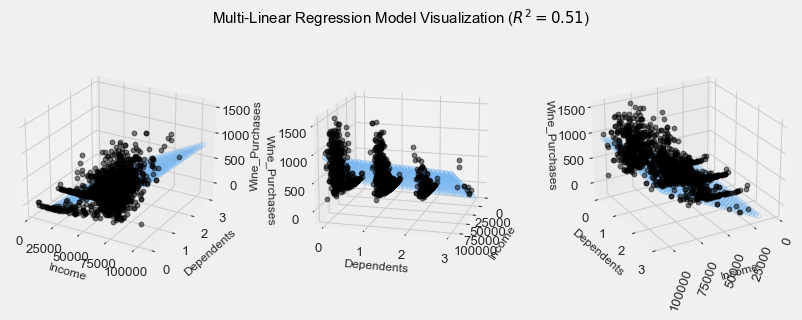

In [29]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare data
X = reformat_df[['Income', 'Dependents']].values.reshape(-1,2)
Y = reformat_df['MntWines']

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

xx_pred = np.linspace(17000, 106000, 30)  # range of Income
yy_pred = np.linspace(0, 3, 30)  # range of Dependents
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predict using model built on previous step
model = LinearRegression().fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

# ax1 = fig.add_subplot(111, projection='3d')
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
# axes = [ax1]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Income', fontsize=12)
    ax.set_ylabel('Dependents', fontsize=12)
    ax.set_zlabel('Wine_Purchases', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')
plt.xticks(rotation=70)
fig.tight_layout()

<img src="MLR_GIF.gif" width=500 align="center">

In [30]:
# Code used to make GIF of spinning 3D Model

# for ii in np.arange(0, 360, 1):
#     ax1.view_init(elev=32, azim=ii)
#     extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#     fig.savefig('gif_image%d.png' % ii, box_inches="tight")

## Validation of Model

In [31]:
y_actual = y1                   # observed y values
y_predicted = reg.predict(X1)   # predicted y values
MSE = np.square(np.subtract(y_actual,y_predicted)).mean()
print('MSE:',MSE)               
print('Singular values of x i.e. (Sqrt(Sum(Xi - X_Avg))):',reg.singular_)

MSE: 54267.32302604561
Singular values of x i.e. (Sqrt(Sum(Xi - X_Avg))): [7.409e+05 2.334e+01]


In [32]:
from scipy import stats

X1_std_err = np.sqrt(MSE)/reg.singular_
T_stats = reg.coef_/X1_std_err
P_value = stats.t.sf(np.abs(T_stats), len(X1-1)*2) 

print('The Standard Error is:', X1_std_err)
print('The T Statistics is (b1 / X1_S.E.) : ',reg.coef_/X1_std_err)
print('The P-value is : ',P_value) #

The Standard Error is: [3.144e-04 9.983e+00]
The T Statistics is (b1 / X1_S.E.) :  [34.613 -4.052]
The P-value is :  [4.848e-216 2.614e-005]


As P-value <0.05, there is sufficient evidence that the IVs: (1) Income and (2) Dependents affect Wine Spending. 

In [33]:
r_sq_mlr = reg.score(X1, y1)
print('coefficient of determination:', r_sq_mlr) #refers to how close the data are to the fitted regression line
print('Pearson Correlation:',np.sqrt(r_sq_mlr))

coefficient of determination: 0.5089800293772425
Pearson Correlation: 0.7134283631712734


In [34]:
predicted = reg.predict([[50000, 1]])
print(f" A customer with Income:$50000 and Dependent:1 is expected to spend ${predicted[0].round()} on Wine products.")

 A customer with Income:$50000 and Dependent:1 is expected to spend $279.0 on Wine products.


## Chi Square Goodness of Fit for Non-Normal data

In [35]:
from numpy.random import randn
from sklearn.model_selection import StratifiedShuffleSplit

stratifiedSampling = StratifiedShuffleSplit(n_splits=1, test_size=0.05)

for x, y in stratifiedSampling.split(reformat_df, reformat_df.Dependents):
    stratified_random_sample = reformat_df.iloc[y].sort_values(by='Dependents')

In [36]:
observation = stratified_random_sample.loc[:,'MntWines'].tolist()
# observation

In [37]:
stratified_random_sample.head()

Age   Income  Dependents  Days_Regis  Recency  MntWines  MntFruits  \
663    27  80685.0           0        3288       55       241         45   
1176   39  61416.0           0        3118       25       848        154   
105    67  86718.0           0        3140       20       344        189   
465    29  48789.0           0        3269       94       351         16   
415    67  63564.0           0        2763        0       769         80   

      MntMeatProducts  MntFishProducts  MntSweetProducts  
663               604               34                26  
1176              323              201                61  
105               482               50                33  
465               156                7                 5  
415               252               15                34

In [38]:
Dependents = []
Income = []
Prediction = []

for row in stratified_random_sample.iterrows():
    Dependents.append(row[1][2])
    Income.append(row[1][1])

for i in range(len(stratified_random_sample)):
    Prediction.append(reg.predict([[Income[i], Dependents[i]]]).tolist())

flat_list = [item for sublist in Prediction for item in sublist]

print(flat_list)

[653.4697195069265, 443.77706468461633, 719.12314140443, 306.36520353762853, 467.1524252408633, 717.621372430146, 722.1919736562279, 195.70224194709073, -62.3626091845851, 16.175555216920543, 232.48469943317764, 642.6308651707897, 674.9297805017677, 442.34059001356206, 547.2467705360111, 571.688604711677, 761.7820861811936, 645.0141072386751, 778.3777215854192, 500.8878152428956, 346.8912010755538, 652.4250106552506, 553.1450225944309, 558.5644497624993, 622.7596322212054, 160.83508402240955, 459.360711749296, 478.80753172788707, 468.2733841401556, 272.7060635832126, 256.8721950500006, 401.8255482200235, 96.8032106822929, 400.7590746006043, 469.2310339208585, 418.08382972422885, 519.1920582754811, 490.0925638027603, 329.0550472704782, 388.92992333214977, 369.34163236322786, 106.89118053128777, 336.41153876769556, 407.7564474300581, 27.569484491025264, 441.90536801921223, 94.51791006925203, 380.2131338509795, 458.3921795847215, 324.7673880250587, 466.54308510456747, 517.9841136657309, 1

In [39]:
from scipy.stats import chisquare

(chisq, pvalue) = chisquare(f_obs=observation, f_exp=flat_list,ddof=0)    #0 is the MLE of variance for sample s.d. of the believed normally distributed variables 
print('The chi-square is',chisq)
print('The P-value is', pvalue)

The chi-square is 6017.265636218658
The P-value is 0.0


### Conclusion: 

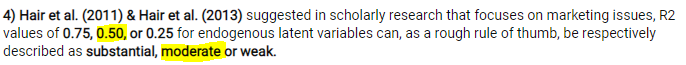

> Multiple Linear Regression is considered a moderate fit as R^2 is 0.5089800293772425. 50% of our dependent variables can be explained using our independent variables.

> High MSE of 54267.32302604561 indicates high error.

> As chi-sq P < 0.05, there is sufficient evidence to conclude that the observed data is significantly different from the predicted data using the MLR Model.

## 5.2 Non-Linear (Exponential) Regression
> IV: Income

> DV: Wine

In [40]:
X2 = reformat_df.Income.values
y2 = reformat_df.MntWines.values

fit = np.polyfit(X2, np.log(y2), 1)
print('The Equation can be written as : ln(y)={}+{}(x)'.format(fit[1], fit[0]))
print(fit)

The Equation can be written as : ln(y)=1.4500348839528703+6.43807638887985e-05(x)
[6.438e-05 1.450e+00]


In [41]:
print('The Equation by taking exp^() on both sides /n can be re-written as : y={}*{}ˣ'.format(np.exp(fit[1]), np.exp(fit[0])))

The Equation by taking exp^() on both sides /n can be re-written as : y=4.263263232048546*1.0000643828363747ˣ


In [42]:
def exponential_Regression_fit_rawValues(x_input):
      return np.exp(fit[1])*np.exp(fit[0])**x_input
    
print(exponential_Regression_fit_rawValues(2))
print(exponential_Regression_fit_rawValues(100))

4.263812211678592
4.290798989948434


In [43]:
def origRegModel(x_input1):
      return -279.4468676113729 + 0.011*x_input1
# origRegModel(X2)

Text(0, 0.5, 'Wine Purchases')

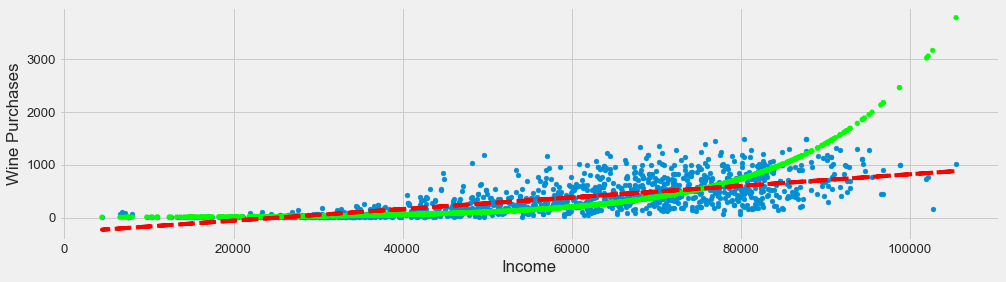

In [44]:
plt.scatter(X2,y2)
plt.scatter(X2, exponential_Regression_fit_rawValues(X2), linestyle = 'dashed', color='lime')
plt.plot(X2, origRegModel(X2), linestyle = 'dashed', color='red')
plt.xlabel("Income")
plt.ylabel("Wine Purchases")

In [45]:
from sklearn.metrics import r2_score

expReg_Score = r2_score(y2, exponential_Regression_fit_rawValues(X2))
linReg_Score = r2_score(y2, origRegModel(X2))

print('The score in Exponential Reg is: {}'.format(expReg_Score))

The score in Exponential Reg is: -0.09221381497862913


## 5.3 Ridge Regression

In [46]:
from sklearn.linear_model import Ridge

X3 = np.array(reformat_df.Income.values).reshape(-1,1)
y3 = np.array(reformat_df.MntWines.values).reshape(-1,1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.33, random_state=123, shuffle=True)

ridgeReg = Ridge(alpha=1.0, normalize='True',max_iter=1000, solver='saga',random_state=123)
#compare old ver sag vs saga
ridgeReg.fit(X_train3, y_train3)

Ridge(max_iter=1000, normalize='True', random_state=123, solver='saga')

coefficient of determination: 0.36684359921958387
Pearson Correlation: 0.6056761504464113


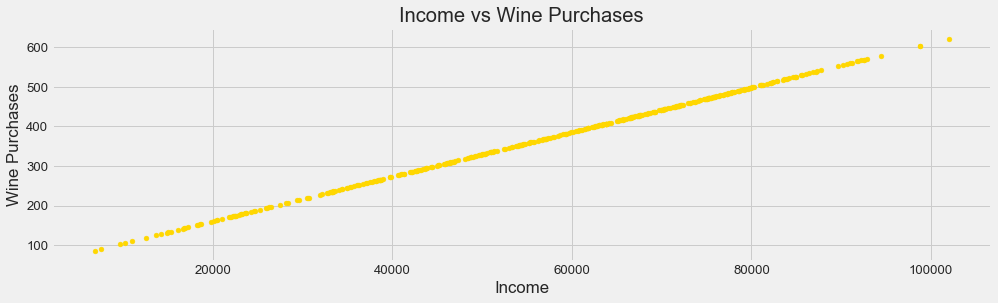

In [47]:
X_Newsamples3 = np.array([50000,60000]).reshape(-1,1)

# print(ridgeReg.predict(X_Newsamples3))
# print(ridgeReg.predict(X_test3))

#scores
r_sq = ridgeReg.score(X_train3, y_train3)  #R^2
print('coefficient of determination:', r_sq)
print('Pearson Correlation:',np.sqrt(r_sq))

y_predict_test3 = ridgeReg.predict(X_test3)
plt.scatter(X_test3, y_predict_test3, color="gold")  
plt.title('Income vs Wine Purchases')  
plt.xlabel('Income')  
plt.ylabel('Wine Purchases')  
plt.show()

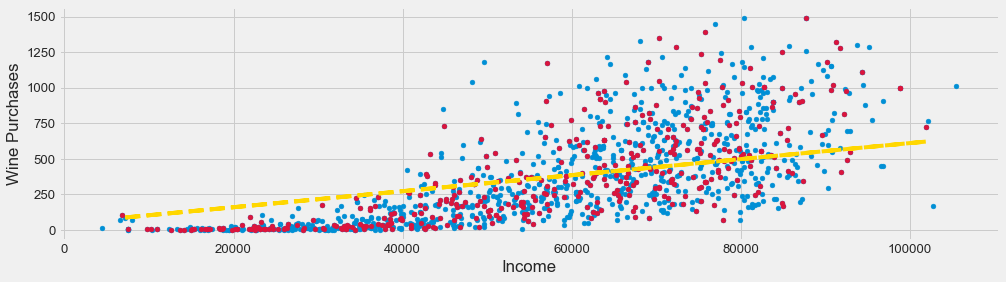

In [48]:
plt.scatter(X3,y3)
plt.scatter(X_test3, y_test3, color='crimson')  #test data
plt.plot(X_test3, y_predict_test3, linestyle = 'dashed', color='gold') #predict
plt.xlabel("Income")
plt.ylabel("Wine Purchases")
plt.show()

In [49]:
print('The score in Ridge Reg is: {}'.format(r_sq))

The score in Ridge Reg is: 0.36684359921958387


## 5.4 Polynomial Regression

In [50]:
X2 = reformat_df.Income.values
y2 = reformat_df.MntWines.values

mymodel = np.poly1d(np.polyfit(X2, y2, 3))
print(mymodel)

            3             2
-2.625e-12 x + 4.784e-07 x - 0.01483 x + 121.5


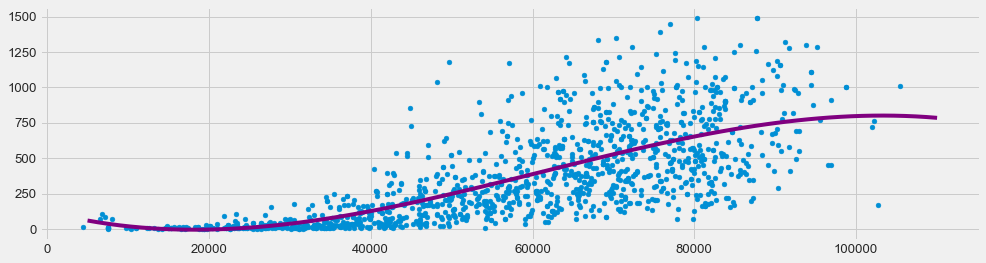

In [51]:
myline = np.linspace(5000, 110000, 80)

plt.scatter(X2, y2)
plt.plot(myline, mymodel(myline), color="purple")
plt.show()

In [52]:
polyReg_Score = r2_score(y2, mymodel(X2))

print('The score in Polynomial Reg is: {}'.format(polyReg_Score))

The score in Polynomial Reg is: 0.5174709460939515


# 6. Wine Model Comparison & Conclusion

Text(0, 0.5, 'Wine Purchases')

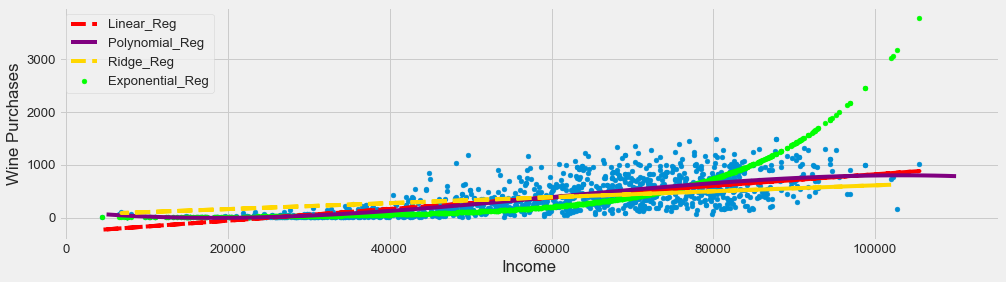

In [53]:
plt.scatter(X2,y2)
plt.scatter(X2, exponential_Regression_fit_rawValues(X2), color='lime', label="Exponential_Reg")
plt.plot(X2, origRegModel(X2), linestyle = 'dashed', color='red', label="Linear_Reg")
plt.plot(myline, mymodel(myline), color='purple', label="Polynomial_Reg")
plt.plot(X_test3, y_predict_test3, linestyle = 'dashed', color='gold', label="Ridge_Reg")
plt.legend()
plt.xlabel("Income")
plt.ylabel("Wine Purchases")

In [54]:
print('The score in Polynomial Reg is: {}'.format(polyReg_Score))
print('The score in Linear Reg is: {}'.format(linReg_Score))
print('The score in Ridge Reg is: {}'.format(r_sq))
print('The score in Exponential Reg is: {}'.format(expReg_Score))

The score in Polynomial Reg is: 0.5174709460939515
The score in Linear Reg is: 0.49923856680485
The score in Ridge Reg is: 0.36684359921958387
The score in Exponential Reg is: -0.09221381497862913


### Since R2 is similar for Poly/Lin Regression, we will look at the MSE and Goodness of fit Test results for these two Models only.

In [55]:
y_actual = y1                   #observed y values
y_predicted = reg.predict(X1)   #predicted y values
MSE = np.square(np.subtract(y_actual,y_predicted)).mean()
print('MSE of Linear Reg Model:',MSE)               
# print('Singular values of x i.e. (Sqrt(Sum(Xi - X_Avg))):',reg.singular_)

MSE of Linear Reg Model: 54267.32302604561


In [56]:
y_actual = y2               #observed y values
y_predicted = mymodel(X2)   #predicted y values
MSE = np.square(np.subtract(y_actual,y_predicted)).mean()
print('MSE of Polynomial Reg Model:',MSE)               
# print('Singular values of x i.e. (Sqrt(Sum(Xi - X_Avg))):',reg.singular_)

MSE of Polynomial Reg Model: 53328.91044036507


### Chi Square Goodness of Fit

In [57]:
Income = []
Prediction = []

for row in stratified_random_sample.iterrows():
    Income.append(row[1][1])

for i in Income:
    Prediction.append(mymodel(i).tolist())

print(Prediction)

[660.3369713874806, 406.93109926351997, 721.0151221946318, 231.73818960064634, 437.4399854590677, 719.7803530788913, 723.5140787507817, 110.9889713839342, -1.9893994341847048, -0.923997141456681, 147.9408661180817, 649.1277828623668, 681.5963633029123, 405.0530796055338, 539.4684948229582, 569.1647216500918, 752.678527348372, 651.618377421609, 763.0942201149219, 481.06926855660504, 281.70676685450496, 659.2698847968018, 546.7154883985706, 553.330514719876, 627.820234737611, 79.627977310548, 479.68728943493744, 504.47962846547074, 491.09159861566826, 239.95087733516158, 220.9156518153638, 404.9677113180376, 60.70769309968062, 403.57332268379514, 492.31295299765327, 426.20641273955033, 554.6403921347429, 518.6971099308895, 310.4235298149994, 388.10597139257885, 362.5296675040144, 68.56179799210086, 319.8626113060568, 412.72035046756406, 17.510107301881916, 457.1821259078094, 58.97970999227769, 376.7149134455891, 478.44413743391675, 304.94218928304883, 488.8827886977911, 553.1716237564077

In [58]:
from scipy.stats import chisquare

(chisq, pvalue) = chisquare(f_obs=observation, f_exp=Prediction,ddof=0)    #0 is the MLE of variance for sample s.d. of the believed normally distributed variables 
print('The chi-square for Polynomial Reg is',chisq)
print('The P-value is', pvalue)

The chi-square for Polynomial Reg is 6391.343427537258
The P-value is 0.0


In [59]:
from scipy.stats import chisquare

(chisq, pvalue) = chisquare(f_obs=observation, f_exp=flat_list,ddof=0)    #0 is the MLE of variance for sample s.d. of the believed normally distributed variables 
print('The chi-square for Linear Regression is',chisq)
print('The P-value is', pvalue)

The chi-square for Linear Regression is 6017.265636218658
The P-value is 0.0


## Conclusion:

Polynomial Regression is the best fit model (Moderate fit) as:

> R2: 0.5174709460939515 > 0.49345622539303147 (Polynomial model has slightly higher R2 indicating that there are smaller differences between the observed data and the predicted values)

> MSE: 53328.91044036507 < 54267.32302604561  (Polynomial Model has slightly lower errors)

# 7. Clustering for Fruits/Fish/Sweets

## K-means

In [60]:
# Sweet, Fruit & Fish
sweet_fruit_fish = reformat_df[['MntFruits','MntFishProducts', 'MntSweetProducts']]
sweet_fruit_fish.head(3)

MntFruits  MntFishProducts  MntSweetProducts
0         88              172                88
1         49              111                21
2          4               10                 3

- normalize the data so that the scale of each variable is the same

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(sweet_fruit_fish)
scaled_df = scaler.transform(sweet_fruit_fish)
scaled_df = pd.DataFrame(scaled_df , columns=sweet_fruit_fish.columns)
scaled_df.head(3)

MntFruits  MntFishProducts  MntSweetProducts
0   1.058090         1.918948          1.011848
1   0.188643         0.906141         -0.453902
2  -0.814566        -0.770801         -0.847686

- use an elbow plot to find the optimal number of clusters

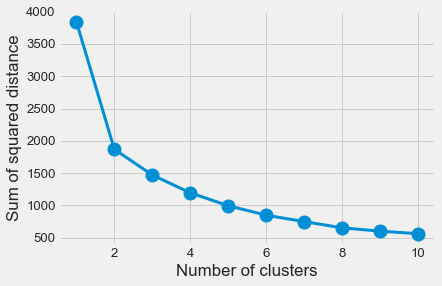

In [62]:
# testing for Elbow Point
from sklearn.cluster import KMeans

sse = []
list_k = list(range(1, 11))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_df)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 4))
plt.plot(list_k, sse, '-o', linewidth=3, markersize=13)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.show()

- a drastic reduction in SSE until **2**, and slowly become gradual afterwards, hence we decide to get 2 clusters

In [63]:
# implement k-means
X = scaled_df.values
km = KMeans(n_clusters = 2, init='k-means++', random_state=123)
y_cluster = km.fit_predict(X)

# assign datapoints to clusters
kmeans_cluster_df = reformat_df.copy()
kmeans_cluster_df['Cluster'] = y_cluster+1
kmeans_cluster_df.head(3)

Age   Income  Dependents  Days_Regis  Recency  MntWines  MntFruits  \
0   64  58138.0           0        3275       58       635         88   
1   56  71613.0           0        2924       26       426         49   
2   37  26646.0           1        2751       26        11          4   

   MntMeatProducts  MntFishProducts  MntSweetProducts  Cluster  
0              546              172                88        2  
1              127              111                21        1  
2               20               10                 3        1

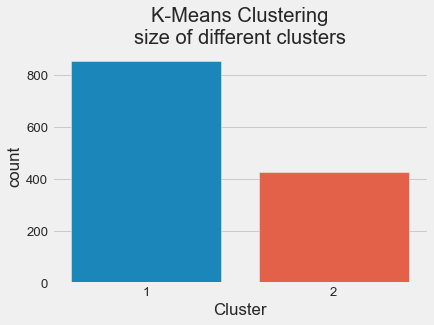

In [64]:
# countplot to check the number of customers in each cluster
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data= kmeans_cluster_df)
plt.title('K-Means Clustering\nsize of different clusters') 
plt.show()

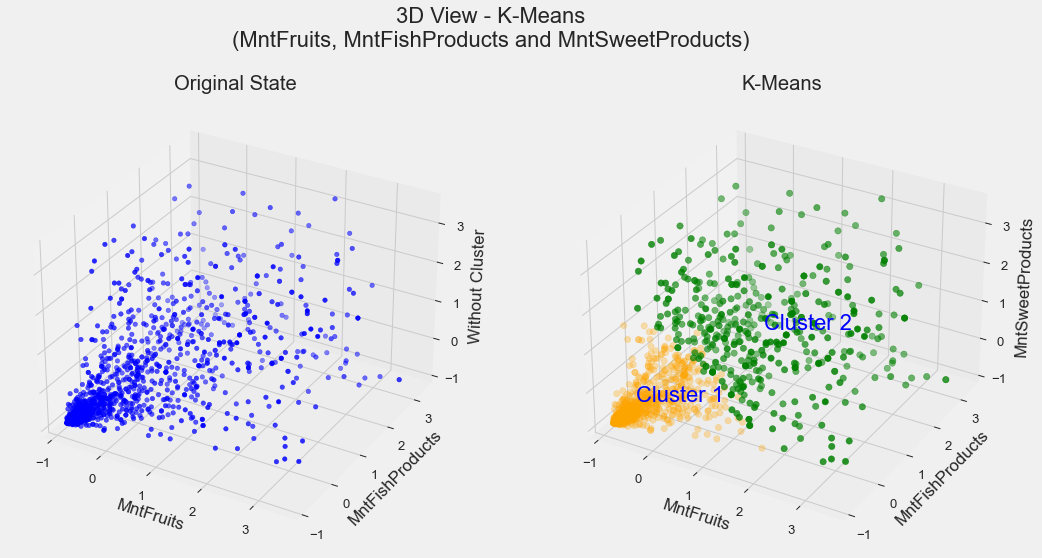

In [65]:
# Using K-Means on the Fruits, Fish and Sweet data 
fig = plt.figure(figsize=(16,16))
fig.suptitle("3D View - K-Means\n(MntFruits, MntFishProducts and MntSweetProducts)", fontsize=22, y = 0.75)

# --------------------------------3D plot without clusters-------------------------------- #
ax1 = fig.add_subplot(121, projection='3d')

# Generate the values
x_vals = scaled_df.MntFruits
y_vals = scaled_df.MntFishProducts
z_vals = scaled_df.MntSweetProducts

# Plot the values
ax1.scatter(x_vals, y_vals, z_vals, c = 'b', marker='o')
ax1.set_xlabel('MntFruits')
ax1.set_ylabel('MntFishProducts')
ax1.set_zlabel('Without Cluster')
ax1.set_title('Original State')

# ----------------------------------3D plot with clusters---------------------------------- #
ax2 = fig.add_subplot(122, projection='3d') 

ax2.scatter(X[y_cluster+1 == 1,0],X[y_cluster+1 == 1,1],X[y_cluster+1 == 1,2], 
           s = 40 , color = 'orange', label = "cluster 1", alpha = 0.3)
ax2.scatter(X[y_cluster+1 == 2,0],X[y_cluster+1 == 2,1],X[y_cluster+1 == 2,2], 
           s = 40 , color = 'green', label = "cluster 2")

ax2.set_xlabel('MntFruits')
ax2.set_ylabel('MntFishProducts')
ax2.set_zlabel('MntSweetProducts') 
ax2.set_title('K-Means')
ax2.text(-1,0,-1,'Cluster 1', color = 'blue', fontsize = 22) 
ax2.text(1,1,1,'Cluster 2', color = 'blue', fontsize = 22) 

plt.show()

In [66]:
# Counterchecking the axes 
scaled_df.agg([np.min,np.max]) 

MntFruits  MntFishProducts  MntSweetProducts
amin  -0.859153        -0.903628         -0.869563
amax   3.532671         3.363443          3.418303

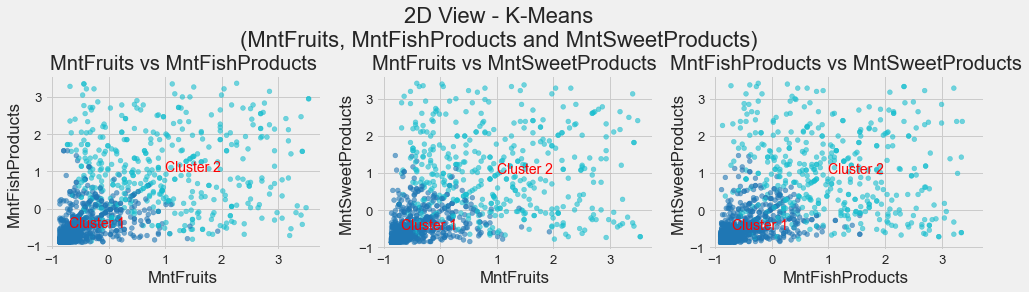

In [67]:
# 2D plots
fig, (ax1, ax2, ax3) =  plt.subplots(figsize = (15,3), nrows = 1, ncols = 3, sharex = True)

fig.suptitle("2D View - K-Means\n(MntFruits, MntFishProducts and MntSweetProducts)", fontsize=22, y = 1.2)

ax1.scatter(x_vals, y_vals, c=y_cluster+1, cmap='tab10', alpha = 0.6)
ax1.set_xlabel('MntFruits')
ax1.set_ylabel('MntFishProducts')
ax1.set_title('MntFruits vs MntFishProducts')
ax1.text(-0.7,-0.5,'Cluster 1', color = 'r')
ax1.text(1,1,'Cluster 2', color = 'r')

ax2.scatter(x_vals, z_vals, c=y_cluster+1, cmap='tab10', alpha = 0.6)
ax2.set_xlabel('MntFruits')
ax2.set_ylabel('MntSweetProducts')
ax2.set_title('MntFruits vs MntSweetProducts')
ax2.text(-0.7,-0.5,'Cluster 1', color = 'r')
ax2.text(1,1,'Cluster 2', color = 'r') 

ax3.scatter(y_vals, z_vals, c=y_cluster+1, cmap='tab10', alpha = 0.6)
ax3.set_xlabel('MntFishProducts') 
ax3.set_ylabel('MntSweetProducts')
ax3.set_title('MntFishProducts vs MntSweetProducts')
ax3.text(-0.7,-0.5,'Cluster 1', color = 'r')
ax3.text(1,1,'Cluster 2', color = 'r')

plt.show()

# clusters analysis

In [68]:
kmeans_cluster_df_mean = kmeans_cluster_df.groupby('Cluster').mean().reset_index()
kmeans_cluster_df_mean

Cluster        Age        Income  Dependents   Days_Regis    Recency  \
0        1  51.771395  49946.011723    0.941383  2968.709261  49.575615   
1        2  52.221445  73322.652681    0.365967  2999.013986  49.384615   

     MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  
0  285.529894  18.193435       136.616647        25.304807         18.413834  
1  549.296037  84.967366       412.473193       118.300699         88.144522

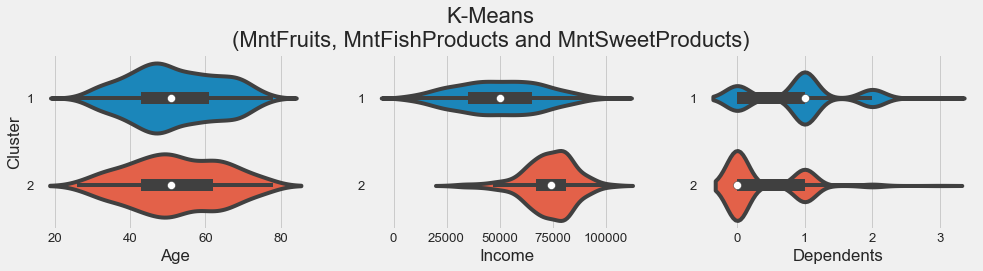

In [69]:
# visualizing the differences on customers' Age, Income and Dependents between clusters
fig1 = plt.figure(1, figsize=(15,3))
fig1.suptitle("K-Means\n(MntFruits, MntFishProducts and MntSweetProducts)", fontsize=22, y = 1.1)

n=0
for cols in ['Age','Income','Dependents']: 
    n+=1 
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.3, wspace=0.2)
    asc_order = kmeans_cluster_df.groupby(by=["Cluster"])[cols].mean() # sort based on lowest amt in cluster 
    sns.violinplot(y='Cluster', x=cols, data=kmeans_cluster_df, orient='h', order=asc_order.index)
    plt.ylabel('Cluster' if n==1 else '')
plt.show() 

- There is no much difference on customers' age between two clusters

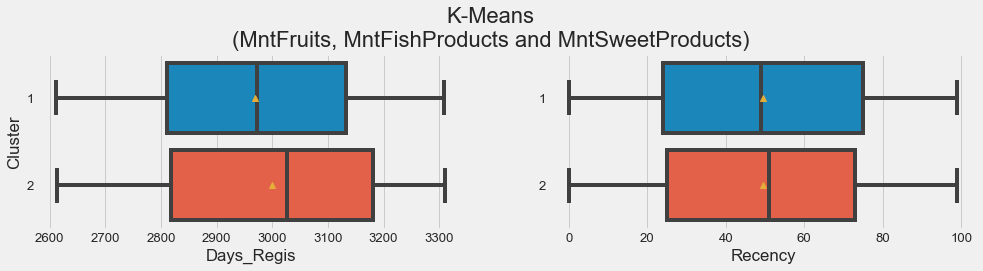

In [70]:
# compare Days_Regis, Recency between clusters
fig2 = plt.figure(2, figsize=(15,3))
fig2.suptitle("K-Means\n(MntFruits, MntFishProducts and MntSweetProducts)", fontsize=22, y = 1.1)

n=0
for cols in ['Days_Regis','Recency']:
    n+=1
    plt.subplot(1,2,n)
    plt.subplots_adjust(hspace=0.3, wspace=0.2) 
    asc_order = kmeans_cluster_df.groupby(by=["Cluster"])[cols].mean()
    sns.boxplot(y='Cluster', x=cols, data=kmeans_cluster_df, orient='h', order=asc_order.index, showmeans = True)
    plt.ylabel('Cluster' if n==1 else '')
plt.show()

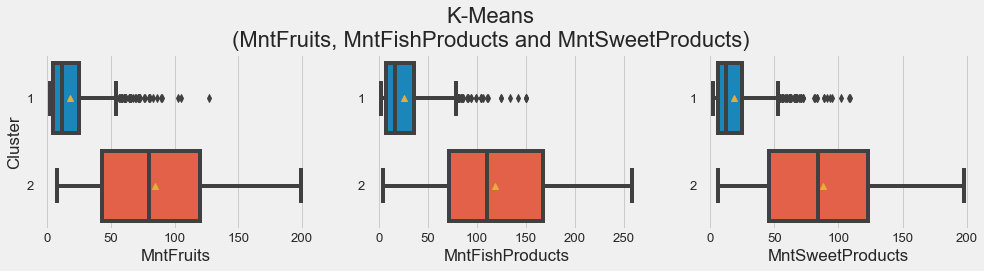

In [71]:
# compare amount of spendings on diffrent products between clusters
fig3 = plt.figure(3, figsize=(15,3))
fig3.suptitle("K-Means\n(MntFruits, MntFishProducts and MntSweetProducts)", fontsize=22, y = 1.1)

n=0
for cols in ['MntFruits','MntFishProducts', 'MntSweetProducts']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.3, wspace=0.2)
    asc_order = kmeans_cluster_df.groupby(by=["Cluster"])[cols].mean()
    sns.boxplot(y='Cluster', x=cols, data=kmeans_cluster_df, orient='h', order=asc_order.index, showmeans = True)
    plt.ylabel('Cluster' if n==1 else '')
plt.show()

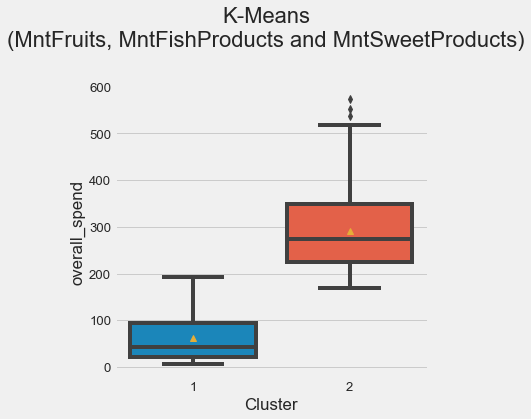

In [72]:
# compare overall spendings (excluding wine and meat products) between clusters
fig4 = plt.figure(4, figsize=(5,5))
fig4.suptitle("K-Means\n(MntFruits, MntFishProducts and MntSweetProducts)", fontsize=22, y = 1.1)

kmeans_cluster_df['overall_spend'] = (kmeans_cluster_df['MntFruits']+kmeans_cluster_df['MntFishProducts']+kmeans_cluster_df['MntSweetProducts'])
asc_order = kmeans_cluster_df.groupby(by=["Cluster"])[cols].mean() 
sns.boxplot(x='Cluster', y='overall_spend', data = kmeans_cluster_df, order=asc_order.index, showmeans = True)
plt.show()

## DBSCAN

In [73]:
# Convert sweet_fruit_fish into array
data_array = np.array(scaled_df) 

# DBSCAN model made using min_samples = 400 as one of the k-means cluster has 429 data points 
# define the model
dbscan_model = DBSCAN(eps=0.99, min_samples=400) 

# train the model
dbscan_model.fit(data_array)

# assign each data point to a cluster
dbscan_result = dbscan_model.fit_predict(data_array)

# get all of the unique clusters
dbscan_clusters = unique(dbscan_result)

In [74]:
# Clusters labels within DBSCAN
dbscan_clusters

array([-1,  0])

In [75]:
# Reassign cluster names: 0 to cluster 1 and -1 to cluster 2
dbscan_reassign = [] 

for i in dbscan_result:
    if i == 0:
        dbscan_reassign.append(1) 
    else:
        dbscan_reassign.append(2)
         
dbscan_reassign = np.array(dbscan_reassign)
dbscan_reassign 

array([2, 1, 1, ..., 2, 1, 1])

In [76]:
# assign datapoints to clusters
dbscan_cluster_df = reformat_df.copy() 
dbscan_cluster_df['Cluster'] = dbscan_reassign 

# update overall_spend column into dbscan_cluster_df, which consists of MntFruits, MntFishProducts, MntSweetProducts
dbscan_cluster_df['overall_spend'] = (dbscan_cluster_df['MntFruits']+dbscan_cluster_df['MntFishProducts']+dbscan_cluster_df['MntSweetProducts'])

dbscan_cluster_df.groupby('Cluster').agg('count')

Age  Income  Dependents  Days_Regis  Recency  MntWines  MntFruits  \
Cluster                                                                      
1        863     863         863         863      863       863        863   
2        419     419         419         419      419       419        419   

         MntMeatProducts  MntFishProducts  MntSweetProducts  overall_spend  
Cluster                                                                     
1                    863              863               863            863  
2                    419              419               419            419

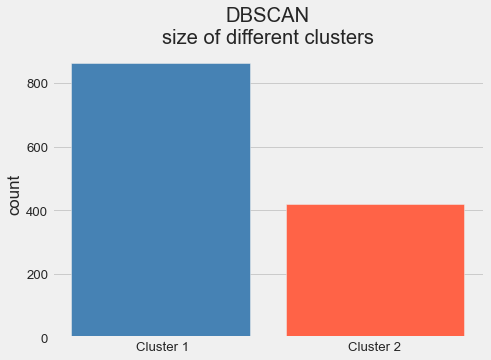

In [77]:
# countplot to check the number of customers in each cluster
count_dbscan_cluster_df = dbscan_cluster_df.groupby('Cluster').agg('count')

data = [count_dbscan_cluster_df['Age'].iloc[0], count_dbscan_cluster_df['Age'].iloc[1]]

fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0,0,1,1])

plt.grid(axis = 'x')

ax.bar(0.00, data[0], color = 'steelblue', width = 0.25)
ax.bar(0.3, data[1], color = 'tomato', width = 0.25)
ax.set_xticks([])

plt.title('DBSCAN\nsize of different clusters')
plt.ylabel('count')

cluster_no = ('Cluster 1', 'Cluster 2')

x_pos = [0.003,0.3]
plt.xticks(x_pos, cluster_no)

plt.show()

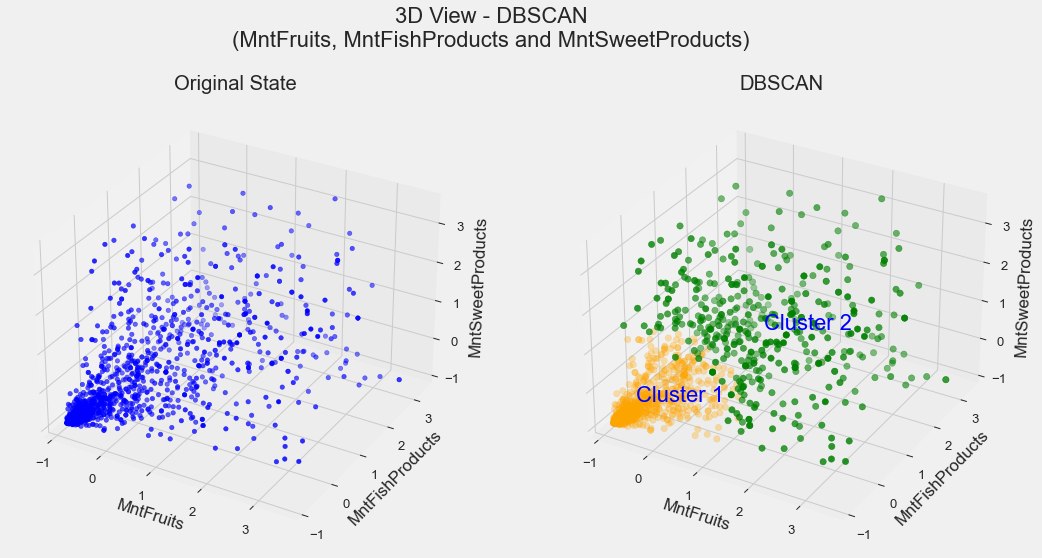

In [78]:
# Using DBSCAN clustering on the Fruits, Fish and Sweet data 
fig = plt.figure(figsize=(16,16))
fig.suptitle("3D View - DBSCAN\n(MntFruits, MntFishProducts and MntSweetProducts)", fontsize=22, y = 0.75)

# --------------------------------3D plot without clusters-------------------------------- #
ax1 = fig.add_subplot(121, projection='3d')

# Generate the values
x_vals = scaled_df.MntFruits
y_vals = scaled_df.MntFishProducts 
z_vals = scaled_df.MntSweetProducts

# Plot the values
ax1.scatter(x_vals, y_vals, z_vals, c = 'b', marker='o')
ax1.set_xlabel('MntFruits')
ax1.set_ylabel('MntFishProducts')
ax1.set_zlabel('MntSweetProducts')
ax1.set_title('Original State')

# ----------------------------------3D plot with clusters---------------------------------- #
ax2 = fig.add_subplot(122, projection='3d')

ax2.scatter(X[dbscan_result == 0,0],X[dbscan_result == 0,1],X[dbscan_result == 0,2], 
           s = 40 , color = 'orange', label = "cluster 1", alpha = 0.3) # reassign cluster names: 0 to cluster 1 and -1 to cluster 2
ax2.scatter(X[dbscan_result == -1,0],X[dbscan_result == -1,1],X[dbscan_result == -1,2], 
           s = 40 , color = 'green', label = "cluster 2")

ax2.set_xlabel('MntFruits')
ax2.set_ylabel('MntFishProducts')
ax2.set_zlabel('MntSweetProducts')
ax2.set_title('DBSCAN')
ax2.text(-1,0,-1,'Cluster 1', color = 'blue', fontsize = 22) 
ax2.text(1,1,1,'Cluster 2', color = 'blue', fontsize = 22) 

plt.show()

In [79]:
# Counterchecking the axes 
scaled_df.agg([np.min,np.max]) 

MntFruits  MntFishProducts  MntSweetProducts
amin  -0.859153        -0.903628         -0.869563
amax   3.532671         3.363443          3.418303

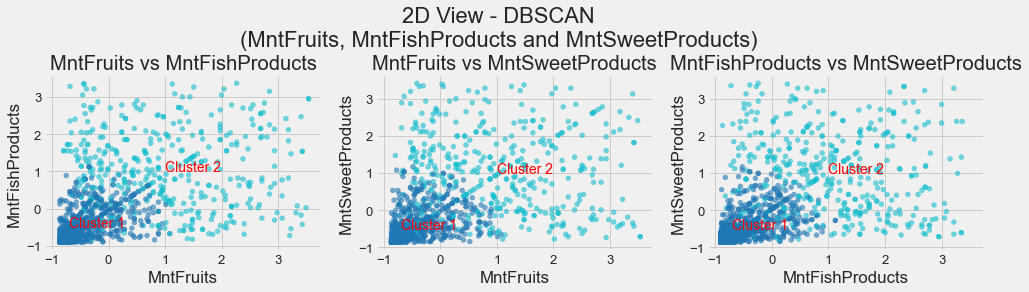

In [80]:
# 2D plots
fig, (ax1, ax2, ax3) =  plt.subplots(figsize = (15,3), nrows = 1, ncols = 3, sharex = True)

fig.suptitle("2D View - DBSCAN\n(MntFruits, MntFishProducts and MntSweetProducts)", fontsize=22, y = 1.2)

ax1.scatter(x_vals, y_vals, c=dbscan_reassign, cmap='tab10', alpha = 0.6)
ax1.set_xlabel('MntFruits')
ax1.set_ylabel('MntFishProducts')
ax1.set_title('MntFruits vs MntFishProducts')
ax1.text(-0.7,-0.5,'Cluster 1', color = 'r')
ax1.text(1,1,'Cluster 2', color = 'r')

ax2.scatter(x_vals, z_vals, c=dbscan_reassign, cmap='tab10', alpha = 0.6)
ax2.set_xlabel('MntFruits')
ax2.set_ylabel('MntSweetProducts')
ax2.set_title('MntFruits vs MntSweetProducts')
ax2.text(-0.7,-0.5,'Cluster 1', color = 'r')
ax2.text(1,1,'Cluster 2', color = 'r')

ax3.scatter(y_vals, z_vals, c=dbscan_reassign, cmap='tab10', alpha = 0.6)
ax3.set_xlabel('MntFishProducts') 
ax3.set_ylabel('MntSweetProducts')
ax3.set_title('MntFishProducts vs MntSweetProducts')
ax3.text(-0.7,-0.5,'Cluster 1', color = 'r')
ax3.text(1,1,'Cluster 2', color = 'r')

plt.show() 

# clusters analysis

In [81]:
# Groupby mean for dbscan 
dbscan_cluster_df_mean = dbscan_cluster_df.groupby('Cluster').mean().reset_index()
dbscan_cluster_df_mean

Cluster        Age        Income  Dependents   Days_Regis    Recency  \
0        1  51.593279  50359.615295    0.931634  2969.032445  50.038239   
1        2  52.599045  73028.682578    0.372315  2999.071599  48.427208   

     MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0  289.513326  18.713789       144.339513        25.837775         19.103129   
1  547.386635  85.489260       403.150358       119.422434         88.389021   

   overall_spend  
0      63.654693  
1     293.300716

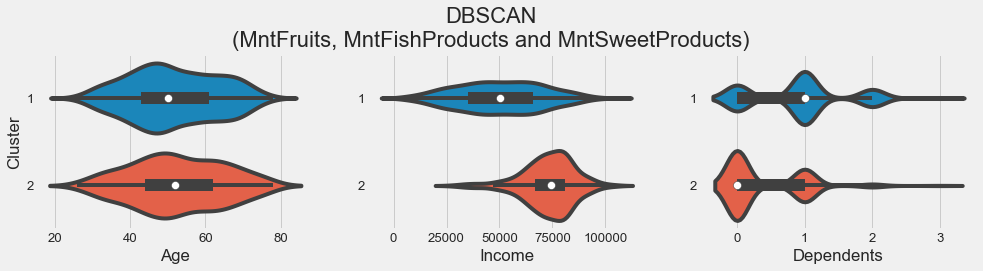

In [82]:
# visualizing the differences on customers' Age, Income and Dependents between clusters
fig1 = plt.figure(1, figsize=(15,3))
fig1.suptitle("DBSCAN\n(MntFruits, MntFishProducts and MntSweetProducts)", fontsize=22, y = 1.1)

n=0 
for cols in ['Age','Income','Dependents']:
    n+=1 
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.3, wspace=0.2)
    asc_order = dbscan_cluster_df.groupby(by=["Cluster"])[cols].mean() # sort based on lowest amt in cluster 
    sns.violinplot(y='Cluster', x=cols, data=dbscan_cluster_df, orient='h', order=asc_order.index)
    plt.ylabel('Cluster' if n==1 else '')
plt.show()

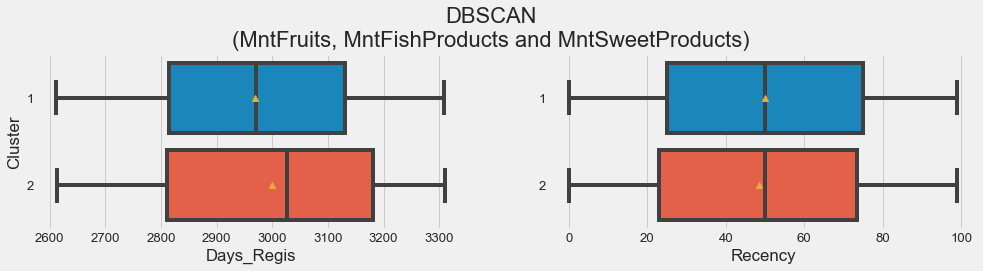

In [83]:
# compare Days_Regis, Recency between clusters
fig2 = plt.figure(2, figsize=(15,3))
fig2.suptitle("DBSCAN\n(MntFruits, MntFishProducts and MntSweetProducts)", fontsize=22, y = 1.1)

n=0
for cols in ['Days_Regis','Recency']:
    n+=1
    plt.subplot(1,2,n)
    plt.subplots_adjust(hspace=0.3, wspace=0.2) 
    asc_order = dbscan_cluster_df.groupby(by=["Cluster"])[cols].mean()
    sns.boxplot(y='Cluster', x=cols, data=dbscan_cluster_df, orient='h', order=asc_order.index, showmeans = True)
    plt.ylabel('Cluster' if n==1 else '')
plt.show()

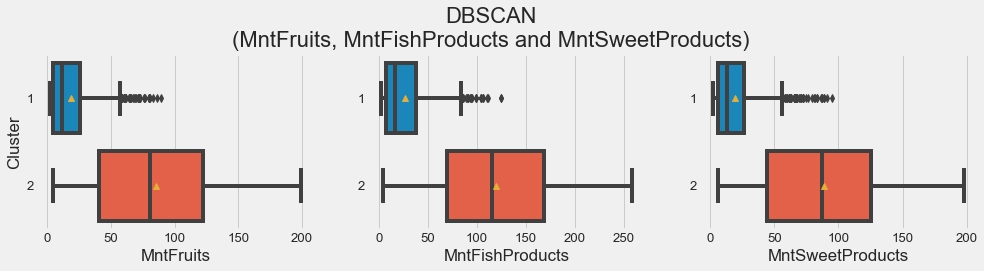

In [84]:
# compare amount of spendings on diffrent products between clusters
fig3 = plt.figure(3, figsize=(15,3))
fig3.suptitle("DBSCAN\n(MntFruits, MntFishProducts and MntSweetProducts)", fontsize=22, y = 1.1)

n=0
for cols in ['MntFruits','MntFishProducts', 'MntSweetProducts']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.3, wspace=0.2)
    asc_order = dbscan_cluster_df.groupby(by=["Cluster"])[cols].mean()
    sns.boxplot(y='Cluster', x=cols, data=dbscan_cluster_df, orient='h', order=asc_order.index, showmeans = True)
    plt.ylabel('Cluster' if n==1 else '')
plt.show()

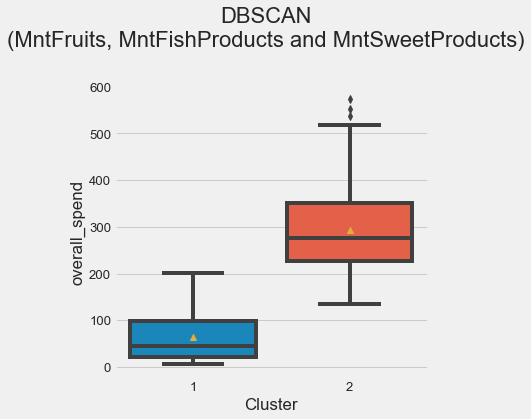

In [85]:
# compare overall spendings (excluding wine and meat products) between clusters
fig4 = plt.figure(4, figsize=(5,5))
fig4.suptitle("DBSCAN\n(MntFruits, MntFishProducts and MntSweetProducts)", fontsize=22, y = 1.1)
asc_order = dbscan_cluster_df.groupby(by=["Cluster"])[cols].mean() 
sns.boxplot(x='Cluster', y='overall_spend', data = dbscan_cluster_df, order=asc_order.index, showmeans = True)
plt.show()

# 8. Cluster Comparison Between K-means & DBSCAN

**K-Means Data Frames**

In [86]:
# kmeans_cluster_1_df is dataframe for kmeans cluster 1
kmeans_cluster_1_df = kmeans_cluster_df[kmeans_cluster_df['Cluster'] == 1]
# dbscan_cluster_2_df is dataframe for kmeans cluster 2
kmeans_cluster_2_df = kmeans_cluster_df[kmeans_cluster_df['Cluster'] == 2]

**DBSCAN Data Frames**

In [87]:
# dbscan_cluster_1_df is dataframe for dbscan cluster 1
dbscan_cluster_1_df = dbscan_cluster_df[dbscan_cluster_df['Cluster'] == 1]
# dbscan_cluster_2_df is dataframe for dbscan cluster 2
dbscan_cluster_2_df = dbscan_cluster_df[dbscan_cluster_df['Cluster'] == 2]

**3D View & 2D View of K-Means & DBSCAN**

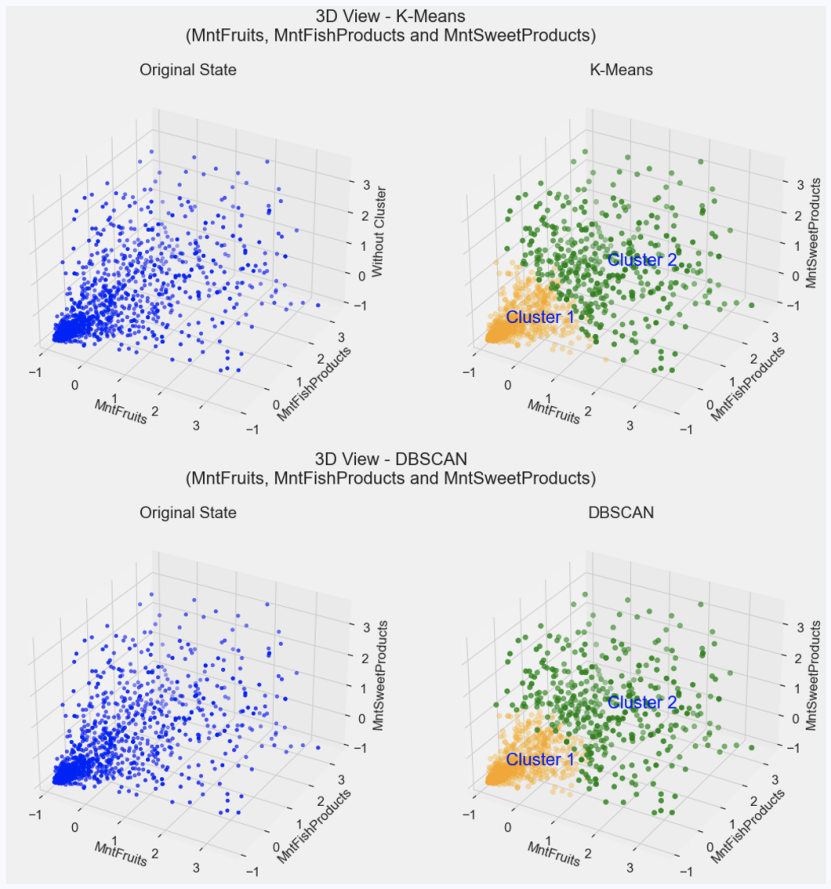

In [88]:
# Create image to 3D Overview Comparison 
image = mpimg.imread('O1.PNG')

fig = plt.figure(figsize=(15, 15))
fig.patch.set_facecolor('ghostwhite')

plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(image) 

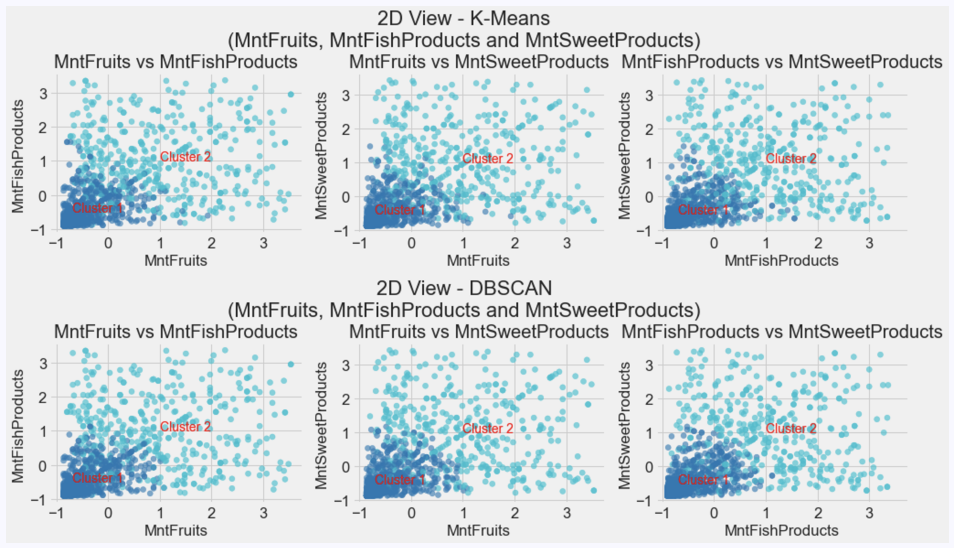

In [89]:
# Create image to 2D Overview Comparison
image = mpimg.imread('O2.PNG')

fig = plt.figure(figsize=(15, 15))
fig.patch.set_facecolor('ghostwhite')

plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(image) 

In [90]:
# Groupby for kmeans
kmeans_cluster_df.groupby('Cluster').agg(['count',np.min,np.max,np.median,np.mean])

Age                             Income                              \
        count amin amax median       mean  count     amin      amax   median   
Cluster                                                                        
1         853   25   78   51.0  51.771395    853   4428.0  101970.0  50014.0   
2         429   26   78   51.0  52.221445    429  26997.0  105471.0  74293.0   

                       ... MntSweetProducts                              \
                 mean  ...            count amin amax median       mean   
Cluster                ...                                                
1        49946.011723  ...              853    2  109   12.0  18.413834   
2        73322.652681  ...              429    6  198   84.0  88.144522   

        overall_spend                               
                count amin amax median        mean  
Cluster                                             
1                 853    6  193   43.0   61.912075  
2                 429  170  574  274.0  291.412587  

[2 rows x 55 columns]

In [91]:
# Groupby for DBSCAN
dbscan_cluster_df.groupby('Cluster').agg(['count',np.min,np.max,np.median,np.mean])

Age                             Income                              \
        count amin amax median       mean  count     amin      amax   median   
Cluster                                                                        
1         863   25   78   50.0  51.593279    863   4428.0  101970.0  50300.0   
2         419   26   78   52.0  52.599045    419  26997.0  105471.0  74293.0   

                       ... MntSweetProducts                              \
                 mean  ...            count amin amax median       mean   
Cluster                ...                                                
1        50359.615295  ...              863    2   95   13.0  19.103129   
2        73028.682578  ...              419    6  198   87.0  88.389021   

        overall_spend                               
                count amin amax median        mean  
Cluster                                             
1                 863    6  202   44.0   63.654693  
2                 419  135  574  276.0  293.300716  

[2 rows x 55 columns]

**Comparing K-Means With DBSCAN** (clustering methods) <br>

- Visually, there is **not much difference** between K-Means cluster 1 and DBSCAN cluster 1, and K-Means cluster 2 and DBSCAN cluster 2, because both K-Means and DBSCAN clusters are modelled based on quite similar concepts. K-Means is modelled is based on distance between points, while DBSCAN is modelled based on distance between nearest points. 


- There is **only a slight difference in their clustering size**. K-Means cluster 1 has 10 data points less than DBSCAN cluster 1, while K-Means cluster 2 has 10 data points more than DBSCAN cluster 2. 

### Age, Income, Dependents

**Box Plots & Violin Plots of K-Means & DBSCAN**

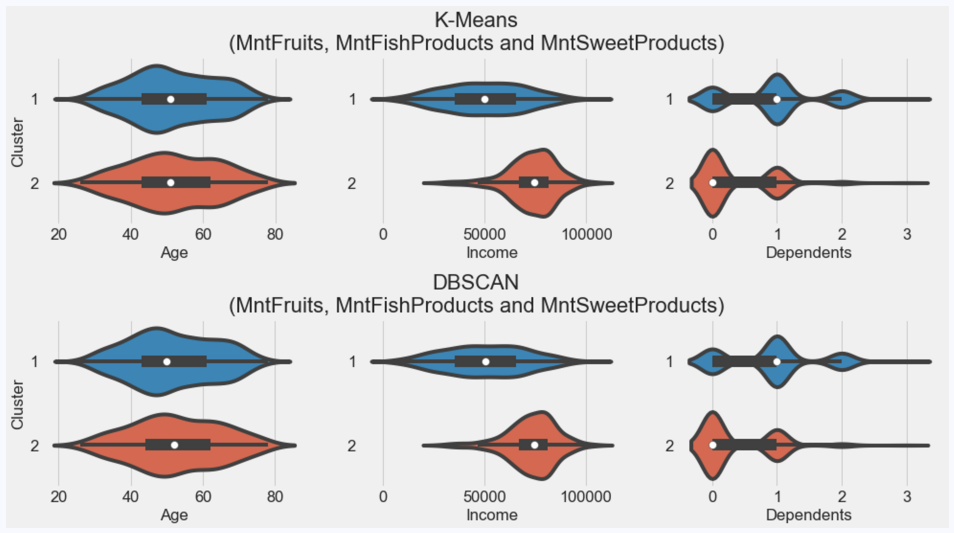

In [92]:
# Boxplot Comparison on Age, Income Dependents
image = mpimg.imread('D1.PNG')

fig = plt.figure(figsize=(15, 15))
fig.patch.set_facecolor('ghostwhite')
 
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(image) 

In [93]:
# Compare Cluster 1 of k-means with Cluster 1 of dbscan for columns Age, Income, Dependents
kmeans_cluster_1_A_I_df = kmeans_cluster_1_df[["Age", "Income", "Dependents"]]
dbscan_cluster_1_A_I_df = dbscan_cluster_1_df[["Age", "Income", "Dependents"]]
compare_clusters_1_A_I_df = pd.concat([kmeans_cluster_1_A_I_df.describe(),dbscan_cluster_1_A_I_df.describe()],axis = 1, join = 'inner')

iterables = [['Cluster 1'],['K-Means', 'DBSCAN'],["Age", "Income", "Dependents"]]
index = pd.MultiIndex.from_product(iterables)

compare_clusters_1_A_I_df = pd.DataFrame(compare_clusters_1_A_I_df.to_numpy(), columns = index)
compare_clusters_1_A_I_df = compare_clusters_1_A_I_df.rename(index = {0: 'count', 1: 'mean', 2: 'std', 3: 'min', 4: '25%', 5: '50%', 6: '75%', 7: 'max'})
pd.set_option('expand_frame_repr', False)
print(compare_clusters_1_A_I_df)

print('\n------------------------------------------------------------------------------------\n')

# Compare Cluster 2 of k-means with Cluster 2 of dbscan for columns Age, Income, Dependents
kmeans_cluster_2_A_I_df = kmeans_cluster_2_df[["Age", "Income", "Dependents"]]
dbscan_cluster_2_A_I_df = dbscan_cluster_2_df[["Age", "Income", "Dependents"]]
compare_clusters_2_A_I_df = pd.concat([kmeans_cluster_2_A_I_df.describe(),dbscan_cluster_2_A_I_df.describe()],axis = 1, join = 'inner')

iterables = [['Cluster 2'],['K-Means', 'DBSCAN'],["Age", "Income", "Dependents"]]
index = pd.MultiIndex.from_product(iterables)

compare_clusters_2_A_I_df = pd.DataFrame(compare_clusters_2_A_I_df.to_numpy(), columns = index)
compare_clusters_2_A_I_df = compare_clusters_2_A_I_df.rename(index = {0: 'count', 1: 'mean', 2: 'std', 3: 'min', 4: '25%', 5: '50%', 6: '75%', 7: 'max'})
print(compare_clusters_2_A_I_df)

        Cluster 1                                                                  
          K-Means                                 DBSCAN                           
              Age         Income  Dependents         Age         Income  Dependents
count  853.000000     853.000000  853.000000  863.000000     863.000000  863.000000
mean    51.771395   49946.011723    0.941383   51.593279   50359.615295    0.931634
std     11.777895   19688.401019    0.692913   11.788067   19875.377964    0.693830
min     25.000000    4428.000000    0.000000   25.000000    4428.000000    0.000000
25%     43.000000   35196.000000    0.000000   43.000000   35355.000000    0.000000
50%     51.000000   50014.000000    1.000000   50.000000   50300.000000    1.000000
75%     61.000000   65275.000000    1.000000   61.000000   65604.500000    1.000000
max     78.000000  101970.000000    3.000000   78.000000  101970.000000    3.000000

---------------------------------------------------------------------------

**Comparing K-Means With DBSCAN** (Age, Income, Dependents) <br>

There is not much difference in the descriptive statistics between cluster 1 of K-Means and cluster 1 of DBSCAN, and between cluster 2 of K-Means and cluster 2 of DBSCAN when Age, Income and Dependents are compared.

> **cluster 1**
- lower income: 49,946 (K-Means), 50,359 (DBSCAN)
- majority of them have kids

> **cluster 2**
- higher income : 73,322 (K-Means), 73,028 (DBSCAN)
- majority of them have no kids

### Days Registered, Recency

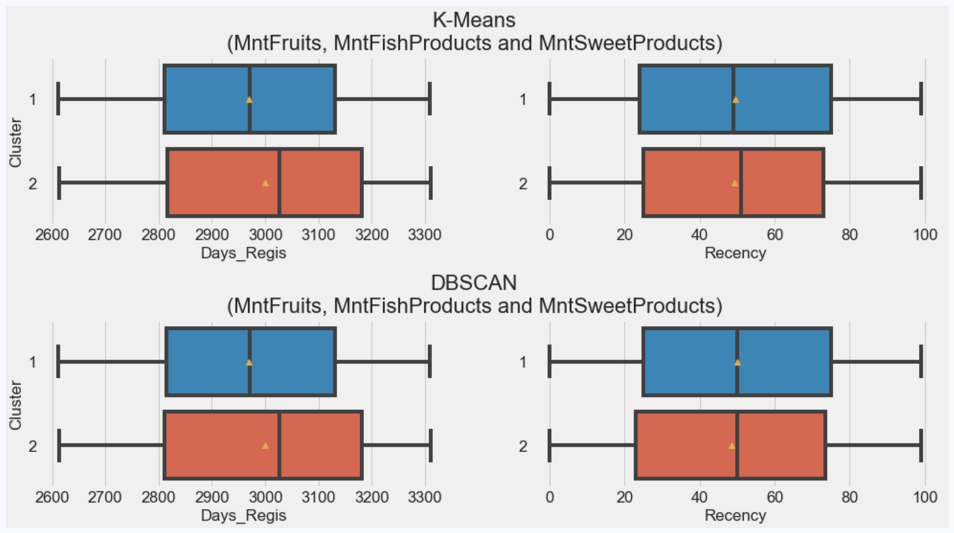

In [94]:
# Boxplot Comparison on Days_Regis, Recency
image = mpimg.imread('D2.PNG')

fig = plt.figure(figsize=(15, 15))
fig.patch.set_facecolor('ghostwhite') 

plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(image) 

In [95]:
# Compare Cluster 1 of k-means with Cluster 1 of dbscan for columns Days_Regis and Recency
kmeans_cluster_1_DR_R_df = kmeans_cluster_1_df[['Days_Regis', 'Recency']]
dbscan_cluster_1_DR_R_df = dbscan_cluster_1_df[['Days_Regis', 'Recency']]
compare_clusters_1_DR_R_df = pd.concat([kmeans_cluster_1_DR_R_df.describe(),dbscan_cluster_1_DR_R_df.describe()],axis = 1, join = 'inner')

iterables = [['Cluster 1'],['K-Means', 'DBSCAN'],['Days_Regis', 'Recency']]
index = pd.MultiIndex.from_product(iterables)

compare_clusters_1_DR_R_df = pd.DataFrame(compare_clusters_1_DR_R_df.to_numpy(), columns = index)
compare_clusters_1_DR_R_df = compare_clusters_1_DR_R_df.rename(index = {0: 'count', 1: 'mean', 2: 'std', 3: 'min', 4: '25%', 5: '50%', 6: '75%', 7: 'max'})
print(compare_clusters_1_DR_R_df)

print('\n--------------------------------------------------------\n')

# Compare Cluster 2 of k-means with Cluster 2 of dbscan for columns Days_Regis and Recency
kmeans_cluster_2_DR_R_df = kmeans_cluster_2_df[['Days_Regis', 'Recency']]
dbscan_cluster_2_DR_R_df = dbscan_cluster_2_df[['Days_Regis', 'Recency']]
compare_clusters_2_DR_R_df = pd.concat([kmeans_cluster_2_DR_R_df.describe(),dbscan_cluster_2_DR_R_df.describe()],axis = 1, join = 'inner')

iterables = [['Cluster 2'],['K-Means', 'DBSCAN'],['Days_Regis', 'Recency']]
index = pd.MultiIndex.from_product(iterables)

compare_clusters_2_DR_R_df = pd.DataFrame(compare_clusters_2_DR_R_df.to_numpy(), columns = index)
compare_clusters_2_DR_R_df = compare_clusters_2_DR_R_df.rename(index = {0: 'count', 1: 'mean', 2: 'std', 3: 'min', 4: '25%', 5: '50%', 6: '75%', 7: 'max'})
print(compare_clusters_2_DR_R_df)

         Cluster 1                                     
           K-Means                   DBSCAN            
        Days_Regis     Recency   Days_Regis     Recency
count   853.000000  853.000000   863.000000  863.000000
mean   2968.709261   49.575615  2969.032445   50.038239
std     196.477369   29.262219   195.609148   29.027984
min    2612.000000    0.000000  2612.000000    0.000000
25%    2811.000000   24.000000  2814.000000   25.000000
50%    2972.000000   49.000000  2971.000000   50.000000
75%    3132.000000   75.000000  3131.500000   75.000000
max    3309.000000   99.000000  3309.000000   99.000000

--------------------------------------------------------

         Cluster 2                                     
           K-Means                   DBSCAN            
        Days_Regis     Recency   Days_Regis     Recency
count   429.000000  429.000000   419.000000  419.000000
mean   2999.013986   49.384615  2999.071599   48.427208
std     207.418264   29.225898   209.399894  

**Comparing K-Means With DBSCAN** (Days Registered, Recency) <br>

There is not much difference in the descriptive statistics between K-Means cluster 1 and DBSCAN cluster 1, and between K-Means cluster 2 and DBSCAN cluster 2 when Days_Regis and Recency are compared. 

>  **cluster 2** seems to have **slightly more days of registration** when compared with cluster 1, probably because they are richer and can easily afford the supermarket subscription cost

>  no much differences in recency between the clusters

### Fruits, Fish, Sweet Products

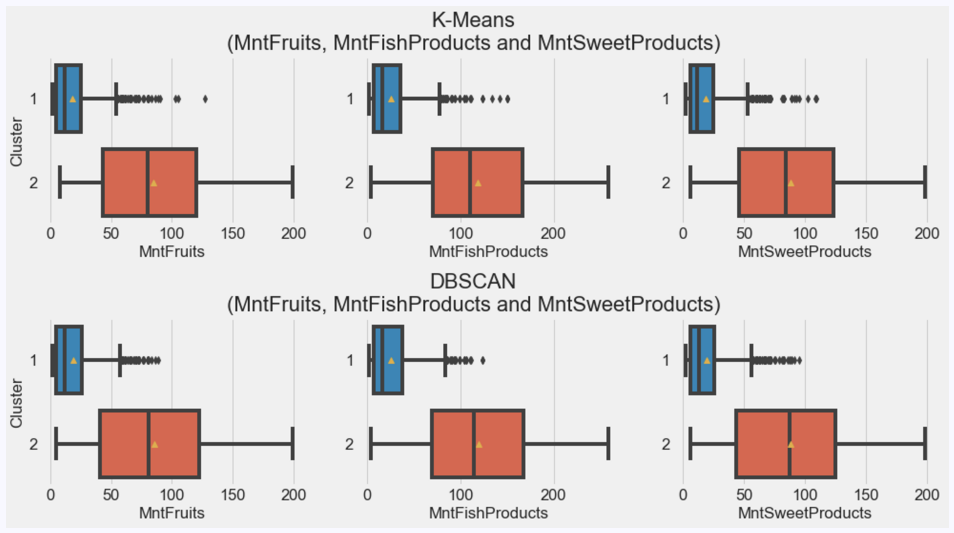

In [96]:
# Boxplot Comparison on MntFruits, MntFishProducts, MntSweetProducts
image = mpimg.imread('D3.PNG')

fig = plt.figure(figsize=(15, 15))
fig.patch.set_facecolor('ghostwhite')
 
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(image) 

In [97]:
# Compare Cluster 1 of k-means with Cluster 1 of dbscan for columns MntFruits, MntMeatProducts and MntFishProducts
kmeans_cluster_1_MF_MMP_MFP_df = kmeans_cluster_1_df[['MntFruits', 'MntFishProducts', 'MntSweetProducts']]
dbscan_cluster_1_MF_MMP_MFP_df = dbscan_cluster_1_df[['MntFruits', 'MntFishProducts', 'MntSweetProducts']]

compare_clusters_1_MF_MMP_MFP_df = pd.concat([kmeans_cluster_1_MF_MMP_MFP_df.describe(),dbscan_cluster_1_MF_MMP_MFP_df.describe()],axis = 1, join = 'inner')

iterables = [['Cluster 1'],['K-Means', 'DBSCAN'],['MntFruits', 'MntFishProducts', 'MntSweetProducts']]
index = pd.MultiIndex.from_product(iterables) 

compare_clusters_1_MF_MMP_MFP_df = pd.DataFrame(compare_clusters_1_MF_MMP_MFP_df.to_numpy(), columns = index)
compare_clusters_1_MF_MMP_MFP_df = compare_clusters_1_MF_MMP_MFP_df.rename(index = {0: 'count', 1: 'mean', 2: 'std', 3: 'min', 4: '25%', 5: '50%', 6: '75%', 7: 'max'})
print(compare_clusters_1_MF_MMP_MFP_df)

print('\n------------------------------------------------------------------------------------------------\n')

# Compare Cluster 2 of k-means with Cluster 2 of dbscan for columns MntFruits, MntMeatProducts and MntFishProducts
kmeans_cluster_2_MF_MMP_MFP_df = kmeans_cluster_2_df[['MntFruits', 'MntFishProducts', 'MntSweetProducts']]
dbscan_cluster_2_MF_MMP_MFP_df = dbscan_cluster_2_df[['MntFruits', 'MntFishProducts', 'MntSweetProducts']]

compare_clusters_2_MF_MMP_MFP_df = pd.concat([kmeans_cluster_2_MF_MMP_MFP_df.describe(),dbscan_cluster_2_MF_MMP_MFP_df.describe()],axis = 1, join = 'inner')

iterables = [['Cluster 2'],['K-Means', 'DBSCAN'],['MntFruits', 'MntFishProducts', 'MntSweetProducts']]
index = pd.MultiIndex.from_product(iterables) 

compare_clusters_2_MF_MMP_MFP_df = pd.DataFrame(compare_clusters_2_MF_MMP_MFP_df.to_numpy(), columns = index)
compare_clusters_2_MF_MMP_MFP_df = compare_clusters_2_MF_MMP_MFP_df.rename(index = {0: 'count', 1: 'mean', 2: 'std', 3: 'min', 4: '25%', 5: '50%', 6: '75%', 7: 'max'})
print(compare_clusters_2_MF_MMP_MFP_df)

        Cluster 1                                                                              
          K-Means                                       DBSCAN                                 
        MntFruits MntFishProducts MntSweetProducts   MntFruits MntFishProducts MntSweetProducts
count  853.000000      853.000000       853.000000  863.000000      863.000000       863.000000
mean    18.193435       25.304807        18.413834   18.713789       25.837775        19.103129
std     18.190731       25.253242        18.081419   18.027123       24.713751        18.472147
min      2.000000        2.000000         2.000000    2.000000        2.000000         2.000000
25%      5.000000        7.000000         6.000000    5.000000        7.000000         6.000000
50%     12.000000       16.000000        12.000000   12.000000       16.000000        13.000000
75%     25.000000       36.000000        25.000000   26.000000       38.000000        26.000000
max    127.000000      150.000000       

**Comparing K-Means With DBSCAN** (Descriptive Stats for Individual Products) <br>

There is not much difference in the descriptive statistics between K-Means cluster 1 and DBSCAN cluster 1, and between K-Means cluster 2 and DBSCAN cluster 2 when MntFruits, MntFishProducts and MntSweetProducts are compared. 

> **cluster 2** consists of **higher amount of spendings on fruits, fish and sweet products**

Note: To see the overall purchasing habits, we sum up MntFruits, MntFishProducts and MntSweetProducts. 

### overall spend

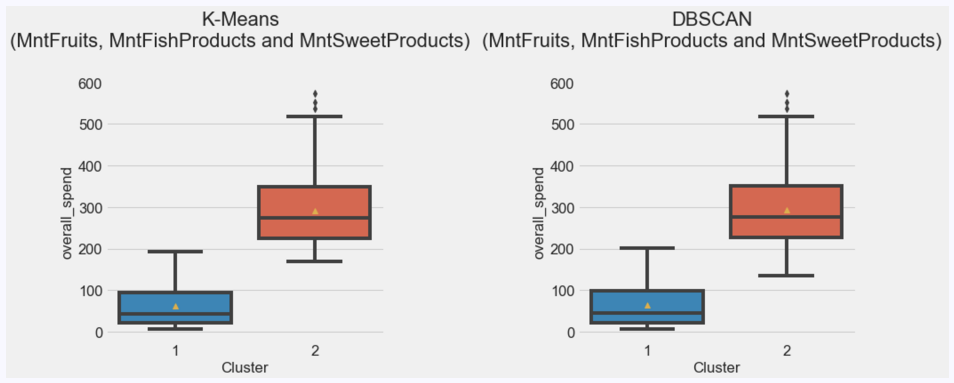

In [98]:
# Boxplot Comparison on overall_spend
image = mpimg.imread('D4.PNG')

fig = plt.figure(figsize=(15, 15))
fig.patch.set_facecolor('ghostwhite')

plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(image)

In [99]:
# Compare Cluster 1 of k-means with Cluster 1 of dbscan for columns MntFruits, MntMeatProducts and MntFishProducts
kmeans_cluster_1_OS_df = kmeans_cluster_1_df[['overall_spend']]
dbscan_cluster_1_OS_df = dbscan_cluster_1_df[['overall_spend']]

compare_clusters_1_OS_df = pd.concat([kmeans_cluster_1_OS_df.describe(),dbscan_cluster_1_OS_df.describe()],axis = 1, join = 'inner')

iterables = [['Cluster 1'],['K-Means', 'DBSCAN'],['overall_spend']]
index = pd.MultiIndex.from_product(iterables) 

compare_clusters_1_OS_df = pd.DataFrame(compare_clusters_1_OS_df.to_numpy(), columns = index)
compare_clusters_1_OS_df = compare_clusters_1_OS_df.rename(index = {0: 'count', 1: 'mean', 2: 'std', 3: 'min', 4: '25%', 5: '50%', 6: '75%', 7: 'max'})
print(compare_clusters_1_OS_df)

print('\n----------------------------------\n')

# Compare Cluster 2 of k-means with Cluster 2 of dbscan for columns MntFruits, MntMeatProducts and MntFishProducts
kmeans_cluster_2_OS_df = kmeans_cluster_2_df[['overall_spend']]
dbscan_cluster_2_OS_df = dbscan_cluster_2_df[['overall_spend']]

compare_clusters_2_OS_df = pd.concat([kmeans_cluster_2_OS_df.describe(),dbscan_cluster_2_OS_df.describe()],axis = 1, join = 'inner')

iterables = [['Cluster 2'],['K-Means', 'DBSCAN'],['overall_spend']]
index = pd.MultiIndex.from_product(iterables) 

compare_clusters_2_OS_df = pd.DataFrame(compare_clusters_2_OS_df.to_numpy(), columns = index)
compare_clusters_2_OS_df = compare_clusters_2_OS_df.rename(index = {0: 'count', 1: 'mean', 2: 'std', 3: 'min', 4: '25%', 5: '50%', 6: '75%', 7: 'max'})
print(compare_clusters_2_OS_df)

          Cluster 1              
            K-Means        DBSCAN
      overall_spend overall_spend
count    853.000000    863.000000
mean      61.912075     63.654693
std       48.342241     50.524294
min        6.000000      6.000000
25%       22.000000     22.000000
50%       43.000000     44.000000
75%       95.000000     98.000000
max      193.000000    202.000000

----------------------------------

          Cluster 2              
            K-Means        DBSCAN
      overall_spend overall_spend
count    429.000000    419.000000
mean     291.412587    293.300716
std       86.027435     86.362429
min      170.000000    135.000000
25%      224.000000    227.000000
50%      274.000000    276.000000
75%      348.000000    350.000000
max      574.000000    574.000000


**Comparing K-Means With DBSCAN** (Descriptive Stats for Overall) <br>

There is not much difference in the descriptive statistics between K-Means cluster 1 and DBSCAN cluster 1, and between K-Means cluster 2 and DBSCAN cluster 2 when overall_spend is compared.

> **cluster 1** customers have **lowest** amount of expenditures

> **cluster 2** customers have the **highest** amount of expenditures

## Conclusion
- For our case, there is not much difference between K-Means and DBSCAN, because they are modelled based on quite similar concepts and share the same number of cluster and similar cluster size (K-Means is modelled is based on distance between points, while DBSCAN is modelled based on distance between nearest points.) However, noticeable differences will occur when the number of cluster for K-Means, or minimum cluster size for DBSCAN begin to vary. 
- Cluster 2 seems to represent high spending shoppers, while cluster 1 represent low spending shoppers. 
    - High spending shoppers and low spending shoppers have similar recency. 
    - It is noticeable that high spending shoppers tends to have fewer kids, longer registration duration, and higher income when compared with low spending shoppers. 

# 9. Binary Regression Models On K-Means

**Data Cleaning**

In [100]:
# kmeans_cluster_df
kmeans_cluster_df

Age   Income  Dependents  Days_Regis  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  Cluster  overall_spend
0      64  58138.0           0        3275       58       635         88              546              172                88        2            348
1      56  71613.0           0        2924       26       426         49              127              111                21        1            181
2      37  26646.0           1        2751       26        11          4               20               10                 3        1             17
3      40  58293.0           1        2773       94       173         43              118               46                27        1            116
4      50  55635.0           1        3205       34       235         65              164               50                49        1            164
...   ...      ...         ...         ...      ...       ...        ...              ...              ...               ...      ...            ...
1280   51  44802.0           0        3289       71       853         10              143               13                10        1             33
1281   47  34421.0           1        2975       81         3          3                7                6                 2        1             11
1282   54  61223.0           1        2993       46       709         43              182               42               118        2            203
1283   40  56981.0           0        2767       91       908         48              217               32                12        1             92
1284   65  69245.0           1        2768        8       428         30              214               80                30        1            140

[1282 rows x 12 columns]

In [101]:
# Drop columns MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts and overall_spend from kmeans_cluster_df
kmeans_cluster_df = kmeans_cluster_df.drop(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','overall_spend'],axis=1)
kmeans_cluster_df

Age   Income  Dependents  Days_Regis  Recency  Cluster
0      64  58138.0           0        3275       58        2
1      56  71613.0           0        2924       26        1
2      37  26646.0           1        2751       26        1
3      40  58293.0           1        2773       94        1
4      50  55635.0           1        3205       34        1
...   ...      ...         ...         ...      ...      ...
1280   51  44802.0           0        3289       71        1
1281   47  34421.0           1        2975       81        1
1282   54  61223.0           1        2993       46        2
1283   40  56981.0           0        2767       91        1
1284   65  69245.0           1        2768        8        1

[1282 rows x 6 columns]

**Recoding**

In [102]:
# Within RecodeCluster cluster 1 is recoded to 0 and cluster 1 is recoded to 0
kmeans_cluster_df['RecodedCluster'] = np.where(kmeans_cluster_df['Cluster'] == 1, 0, 1)
kmeans_cluster_df

Age   Income  Dependents  Days_Regis  Recency  Cluster  RecodedCluster
0      64  58138.0           0        3275       58        2               1
1      56  71613.0           0        2924       26        1               0
2      37  26646.0           1        2751       26        1               0
3      40  58293.0           1        2773       94        1               0
4      50  55635.0           1        3205       34        1               0
...   ...      ...         ...         ...      ...      ...             ...
1280   51  44802.0           0        3289       71        1               0
1281   47  34421.0           1        2975       81        1               0
1282   54  61223.0           1        2993       46        2               1
1283   40  56981.0           0        2767       91        1               0
1284   65  69245.0           1        2768        8        1               0

[1282 rows x 7 columns]

**Rank IVs Based on Correlation**

<AxesSubplot:>

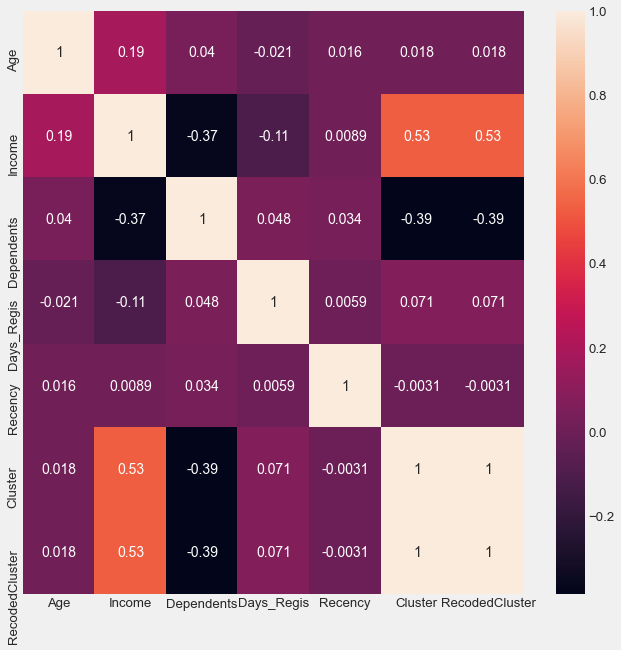

In [103]:
# Correlation matrix 
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(kmeans_cluster_df.corr(), annot=True)

Rank IVs Based on Highest to Lowest Correlation to RecodedCluster <br> 
1. Income
2. Dependents
3. Days_Regis
4. Age
5. Recency

**Procedure for Binary Regression Modelling**
1. Compare logit against probit 
2. Identify the binary regression model with the lowest LLR p-value

Note: IVs to be selected for the models will be based on highest to lowest correlation. 

# 10. Logistic Model Selection

**Logit (1IV)**

In [104]:
# Logit on RecodedCluster ~ Income
log_1I = logit('RecodedCluster ~ Income', data=kmeans_cluster_df).fit()
log_1I.summary()

Optimization terminated successfully.
         Current function value: 0.461358
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                          Logit   Df Residuals:                     1280
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.2762
Time:                        19:14:37   Log-Likelihood:                -591.46
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                3.575e-100
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0459      0.361    -16.743      0.000      -6.754      -5.338
Income      8.478e-05   5.27e-06     16.083      0.000    7.44e-05    9.51e-05
==============================================================================
"""

In [105]:
# Logit on RecodedCluster ~ Dependents
log_1D = logit('RecodedCluster ~ Dependents', data=kmeans_cluster_df).fit()
log_1D.summary()

Optimization terminated successfully.
         Current function value: 0.552628
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                          Logit   Df Residuals:                     1280
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.1330
Time:                        19:14:37   Log-Likelihood:                -708.47
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                 3.364e-49
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2319      0.087      2.670      0.008       0.062       0.402
Dependents    -1.4627      0.112    -13.114      0.000      -1.681      -1.244
==============================================================================
"""

In [106]:
# Logit on RecodedCluster ~ Days_Regis
log_1DR = logit('RecodedCluster ~ Days_Regis', data=kmeans_cluster_df).fit()
log_1DR.summary()

Optimization terminated successfully.
         Current function value: 0.634862
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                          Logit   Df Residuals:                     1280
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                0.004000
Time:                        19:14:37   Log-Likelihood:                -813.89
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                   0.01056
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9482      0.891     -3.310      0.001      -4.694      -1.202
Days_Regis     0.0008      0.000      2.548      0.011       0.000       0.001
==============================================================================
"""

In [107]:
# Logit on RecodedCluster ~ Age
log_1A = logit('RecodedCluster ~ Age', data=kmeans_cluster_df).fit()
log_1A.summary()

Optimization terminated successfully.
         Current function value: 0.637254
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                          Logit   Df Residuals:                     1280
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:               0.0002473
Time:                        19:14:37   Log-Likelihood:                -816.96
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                    0.5249
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8509      0.264     -3.218      0.001      -1.369      -0.333
Age            0.0031      0.005      0.636      0.525      -0.007       0.013
==============================================================================
"""

In [108]:
# Logit on RecodedCluster ~ Recency 
log_1R = logit('RecodedCluster ~ Recency', data=kmeans_cluster_df).fit()
log_1R.summary()

Optimization terminated successfully.
         Current function value: 0.637407
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                          Logit   Df Residuals:                     1280
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:               7.459e-06
Time:                        19:14:37   Log-Likelihood:                -817.16
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                    0.9121
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6762      0.116     -5.813      0.000      -0.904      -0.448
Recency       -0.0002      0.002     -0.110      0.912      -0.004       0.004
==============================================================================
"""

**Probit (1IV)**

In [109]:
# Probit on RecodedCluster ~ Income
pro_1I = probit('RecodedCluster ~ Income', data=kmeans_cluster_df).fit()
pro_1I.summary()

Optimization terminated successfully.
         Current function value: 0.460991
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                         Probit   Df Residuals:                     1280
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.2768
Time:                        19:14:37   Log-Likelihood:                -590.99
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                2.230e-100
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4921      0.190    -18.414      0.000      -3.864      -3.120
Income      4.889e-05    2.8e-06     17.467      0.000    4.34e-05    5.44e-05
==============================================================================
"""

In [110]:
# Probit on RecodedCluster ~ Dependents
pro_1D = probit('RecodedCluster ~ Dependents', data=kmeans_cluster_df).fit()
pro_1D.summary()

Optimization terminated successfully.
         Current function value: 0.553523
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                         Probit   Df Residuals:                     1280
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.1316
Time:                        19:14:37   Log-Likelihood:                -709.62
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                 1.065e-48
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1297      0.053      2.428      0.015       0.025       0.234
Dependents    -0.8550      0.063    -13.624      0.000      -0.978      -0.732
==============================================================================
"""

In [111]:
# Probit on RecodedCluster ~ Days_Regis
pro_1DR = probit('RecodedCluster ~ Days_Regis', data=kmeans_cluster_df).fit()
pro_1DR.summary()

Optimization terminated successfully.
         Current function value: 0.634884
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                         Probit   Df Residuals:                     1280
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                0.003965
Time:                        19:14:37   Log-Likelihood:                -813.92
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                   0.01091
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7952      0.540     -3.326      0.001      -2.853      -0.737
Days_Regis     0.0005      0.000      2.542      0.011       0.000       0.001
==============================================================================
"""

In [112]:
# Probit on RecodedCluster ~ Age
pro_1A = probit('RecodedCluster ~ Age', data=kmeans_cluster_df).fit()
pro_1A.summary()

Optimization terminated successfully.
         Current function value: 0.637255
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                         Probit   Df Residuals:                     1280
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:               0.0002458
Time:                        19:14:37   Log-Likelihood:                -816.96
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                    0.5262
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5265      0.161     -3.270      0.001      -0.842      -0.211
Age            0.0019      0.003      0.634      0.526      -0.004       0.008
==============================================================================
"""

In [113]:
# Probit on RecodedCluster ~ Recency
pro_1R = probit('RecodedCluster ~ Recency', data=kmeans_cluster_df).fit()
pro_1R.summary()

Optimization terminated successfully.
         Current function value: 0.637407
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                         Probit   Df Residuals:                     1280
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:               7.461e-06
Time:                        19:14:37   Log-Likelihood:                -817.16
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                    0.9121
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4204      0.071     -5.908      0.000      -0.560      -0.281
Recency       -0.0001      0.001     -0.110      0.912      -0.003       0.002
==============================================================================
"""

After comparing logit and probit models, probit is seen to be a better model, because it has generally lower LLR p-value for the respective individual variable used. Hence, probit modelling will be used to identify the individual variables. 

# Identify the Binary Regression Model with Lowest LLR p-value

**Probit (2IVs)**

In [114]:
# Probit on RecodedCluster ~ Income + Dependents
pro_1I_D = probit('RecodedCluster ~ Income + Dependents', data=kmeans_cluster_df).fit()
pro_1I_D.summary() 

Optimization terminated successfully.
         Current function value: 0.441888
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                         Probit   Df Residuals:                     1279
Method:                           MLE   Df Model:                            2
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.3067
Time:                        19:14:37   Log-Likelihood:                -566.50
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                1.378e-109
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7003      0.210    -12.832      0.000      -3.113      -2.288
Income       4.14e-05   2.88e-06     14.387      0.000    3.58e-05     4.7e-05
Dependents    -0.4786      0.070     -6.851      0.000      -0.616      -0.342
==============================================================================
"""

In [115]:
# Probit on RecodedCluster ~ Income + Days_Regis
pro_1I_DR = probit('RecodedCluster ~ Income + Days_Regis', data=kmeans_cluster_df).fit()
pro_1I_DR.summary() 

Optimization terminated successfully.
         Current function value: 0.447001
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                         Probit   Df Residuals:                     1279
Method:                           MLE   Df Model:                            2
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.2987
Time:                        19:14:37   Log-Likelihood:                -573.06
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                9.683e-107
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.5629      0.729    -10.379      0.000      -8.991      -6.135
Income      5.232e-05   2.97e-06     17.644      0.000    4.65e-05    5.81e-05
Days_Regis     0.0013      0.000      5.895      0.000       0.001       0.002
==============================================================================
"""

In [116]:
# Probit on RecodedCluster ~ Income + Age
pro_1I_A = probit('RecodedCluster ~ Income + Age', data=kmeans_cluster_df).fit()
pro_1I_A.summary() 

Optimization terminated successfully.
         Current function value: 0.459185
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                         Probit   Df Residuals:                     1279
Method:                           MLE   Df Model:                            2
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.2796
Time:                        19:14:37   Log-Likelihood:                -588.68
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                5.883e-100
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1116      0.256    -12.163      0.000      -3.613      -2.610
Income      4.921e-05   2.79e-06     17.663      0.000    4.37e-05    5.47e-05
Age           -0.0076      0.004     -2.148      0.032      -0.014      -0.001
==============================================================================
"""

In [117]:
# Probit on RecodedCluster ~ Income + Recency
pro_1I_R = probit('RecodedCluster ~ Income + Recency', data=kmeans_cluster_df).fit()
pro_1I_R.summary() 

Optimization terminated successfully.
         Current function value: 0.460991
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                         Probit   Df Residuals:                     1279
Method:                           MLE   Df Model:                            2
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.2768
Time:                        19:14:38   Log-Likelihood:                -590.99
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                 5.955e-99
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4904      0.204    -17.118      0.000      -3.890      -3.091
Income      4.889e-05    2.8e-06     17.465      0.000    4.34e-05    5.44e-05
Recency    -3.122e-05      0.001     -0.022      0.983      -0.003       0.003
==============================================================================
"""

**Probit (3IVs)**

In [118]:
# Probit on RecodedCluster ~ Income + Dependents + Days_Regis
pro_1I_D_DR = probit('RecodedCluster ~ Income + Dependents + Days_Regis', data=kmeans_cluster_df).fit()
pro_1I_D_DR.summary() 

Optimization terminated successfully.
         Current function value: 0.426988
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                         Probit   Df Residuals:                     1278
Method:                           MLE   Df Model:                            3
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.3301
Time:                        19:14:38   Log-Likelihood:                -547.40
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                1.295e-116
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9519      0.743     -9.362      0.000      -8.407      -5.496
Income      4.467e-05   3.03e-06     14.733      0.000    3.87e-05    5.06e-05
Dependents    -0.4993      0.071     -6.999      0.000      -0.639      -0.359
Days_Regis     0.0014      0.000      6.070      0.000       0.001       0.002
==============================================================================
"""

In [119]:
# Probit on RecodedCluster ~ Income + Dependents + Age
pro_1I_D_A = probit('RecodedCluster ~ Income + Dependents + Age', data=kmeans_cluster_df).fit()
pro_1I_D_A.summary() 

Optimization terminated successfully.
         Current function value: 0.440801
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                         Probit   Df Residuals:                     1278
Method:                           MLE   Df Model:                            3
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.3085
Time:                        19:14:38   Log-Likelihood:                -565.11
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                6.143e-109
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4198      0.267     -9.071      0.000      -2.943      -1.897
Income      4.183e-05   2.88e-06     14.548      0.000    3.62e-05    4.75e-05
Dependents    -0.4713      0.070     -6.726      0.000      -0.609      -0.334
Age           -0.0059      0.004     -1.667      0.096      -0.013       0.001
==============================================================================
"""

In [120]:
# Probit on RecodedCluster ~ Income + Dependents + Recency
pro_1I_D_R = probit('RecodedCluster ~ Income + Dependents + Recency', data=kmeans_cluster_df).fit()
pro_1I_D_R.summary() 

Optimization terminated successfully.
         Current function value: 0.441859
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                         Probit   Df Residuals:                     1278
Method:                           MLE   Df Model:                            3
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.3068
Time:                        19:14:38   Log-Likelihood:                -566.46
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                2.376e-108
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7198      0.222    -12.234      0.000      -3.156      -2.284
Income       4.14e-05   2.88e-06     14.384      0.000    3.58e-05     4.7e-05
Dependents    -0.4795      0.070     -6.856      0.000      -0.617      -0.342
Recency        0.0004      0.001      0.275      0.784      -0.002       0.003
==============================================================================
"""

**Probit (4IVs)**

In [121]:
# Probit on RecodedCluster ~ Income + Dependents + Days_Regis + Age
pro_1I_D_DR_A = probit('RecodedCluster ~ Income + Dependents + Days_Regis + Age', data=kmeans_cluster_df).fit()
pro_1I_D_DR_A.summary() 

Optimization terminated successfully.
         Current function value: 0.426033
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                         Probit   Df Residuals:                     1277
Method:                           MLE   Df Model:                            4
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.3316
Time:                        19:14:38   Log-Likelihood:                -546.17
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                5.573e-116
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.6689      0.763     -8.740      0.000      -8.165      -5.173
Income      4.502e-05   3.03e-06     14.883      0.000    3.91e-05     5.1e-05
Dependents    -0.4923      0.072     -6.884      0.000      -0.632      -0.352
Days_Regis     0.0014      0.000      6.043      0.000       0.001       0.002
Age           -0.0056      0.004     -1.563      0.118      -0.013       0.001
==============================================================================
"""

In [122]:
# Probit on RecodedCluster ~ Income + Dependents + Days_Regis + Recency
pro_1I_D_DR_R = probit('RecodedCluster ~ Income + Dependents + Days_Regis + Recency', data=kmeans_cluster_df).fit()
pro_1I_D_DR_R.summary() 

Optimization terminated successfully.
         Current function value: 0.426983
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                         Probit   Df Residuals:                     1277
Method:                           MLE   Df Model:                            4
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.3301
Time:                        19:14:38   Log-Likelihood:                -547.39
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                1.875e-115
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9582      0.744     -9.347      0.000      -8.417      -5.499
Income      4.467e-05   3.03e-06     14.732      0.000    3.87e-05    5.06e-05
Dependents    -0.4997      0.071     -6.997      0.000      -0.640      -0.360
Days_Regis     0.0014      0.000      6.065      0.000       0.001       0.002
Recency        0.0002      0.001      0.120      0.905      -0.003       0.003
==============================================================================
"""

**Probit (5IVs)**

In [123]:
# Probit on RecodedCluster ~ Income + Dependents + Days_Regis + Age + Recency
pro_1I_D_DR_A_R = probit('RecodedCluster ~ Income + Dependents + Days_Regis + Age + Recency', data=kmeans_cluster_df).fit()
pro_1I_D_DR_A_R.summary() 

Optimization terminated successfully.
         Current function value: 0.426029
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                         Probit   Df Residuals:                     1276
Method:                           MLE   Df Model:                            5
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.3316
Time:                        19:14:38   Log-Likelihood:                -546.17
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                6.879e-115
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.6744      0.765     -8.725      0.000      -8.174      -5.175
Income      4.502e-05   3.03e-06     14.881      0.000    3.91e-05     5.1e-05
Dependents    -0.4926      0.072     -6.881      0.000      -0.633      -0.352
Days_Regis     0.0014      0.000      6.038      0.000       0.001       0.002
Age           -0.0056      0.004     -1.562      0.118      -0.013       0.001
Recency        0.0002      0.001      0.102      0.919      -0.003       0.003
==============================================================================
"""

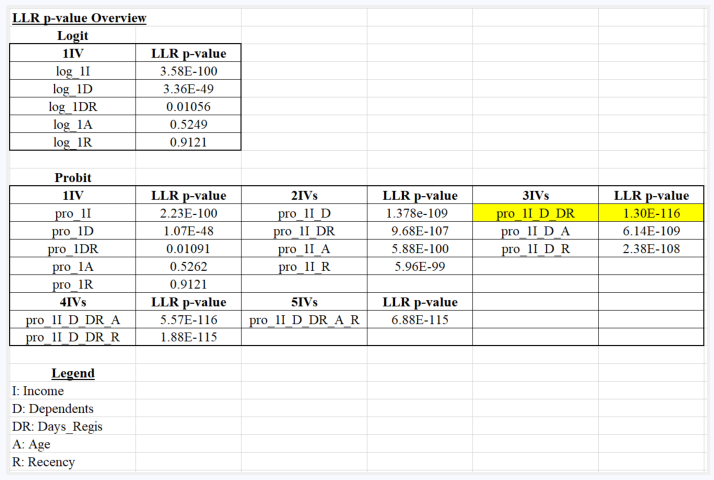

In [124]:
# Create image to summarize LLR p-value findings
image = mpimg.imread('LLR p-value.PNG')

fig = plt.figure(figsize=(15, 8))
fig.patch.set_facecolor('ghostwhite')

plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(image)  

pro_1I_D_DR model is chosen because it has the lowest LLR p-value (<0.05) among the binary regression models. Since its independent variables (Income, Dependents and Days_Regis) are less than 0.05, we do not reject them from the model. 

# KDE Plot on K-Means Clusters

In [125]:
# Count value of RecodedCluster of kmeans_cluster_df
kmeans_cluster_df["RecodedCluster"].value_counts() 

0    853
1    429
Name: RecodedCluster, dtype: int64

/Users/ChristineMac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


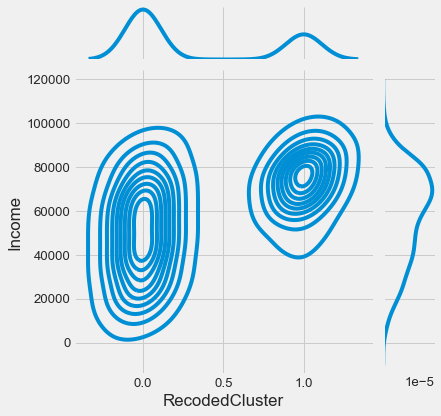

In [126]:
# kde plot of RecodedCluster and Income
sns.jointplot(kmeans_cluster_df["RecodedCluster"], kmeans_cluster_df.Income, kind='kde')

From the kde Income plot, the densest region for Cluster 1 (RecodedCluster 0) lies around 40,000 to 60,000, while the mode for Cluster 2 (RecodedCluster 1) lies around 75,000. 

/Users/ChristineMac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


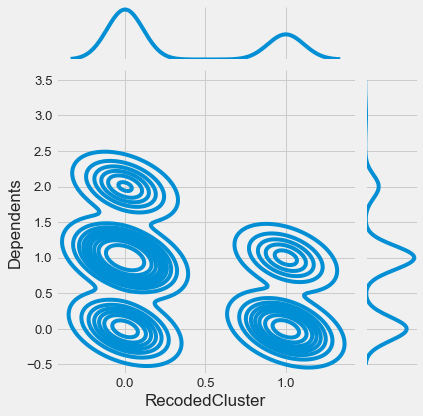

In [127]:
# kde plot of RecodedCluster and Dependents
sns.jointplot(kmeans_cluster_df["RecodedCluster"], kmeans_cluster_df.Dependents, kind='kde')

From the kde Dependents plot, trimodals are present for Cluster 1 and Cluster 2. The trimodals for Cluster 1 and Cluster 2 range from 0 to 2. The densest region for Cluster 1 is at 1 and for Cluster 2 is at 0.

/Users/ChristineMac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


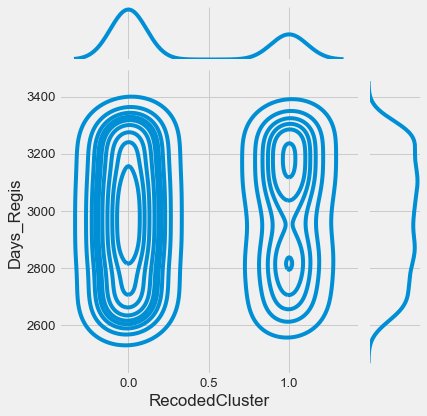

In [128]:
# kde plot of RecodedCluster and Days_Regis
sns.jointplot(kmeans_cluster_df["RecodedCluster"], kmeans_cluster_df.Days_Regis, kind='kde')

From the kde Days_Regis plot, bimodal is present for Cluster 2. The densest region for Cluster 1 is around 2820 to 3180 and for Cluster 2 is around 2800 and around 3150 to 3220. 

# Binary Regression Model with Lowest LLR p-value

In [129]:
# pro_1I_D_DR model is chosen because it has the lowest LLR p-value among the run models
pro_1I_D_DR = probit('RecodedCluster ~ Income + Dependents + Days_Regis', data=kmeans_cluster_df).fit()
pro_1I_D_DR.summary() 

Optimization terminated successfully.
         Current function value: 0.426988
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:         RecodedCluster   No. Observations:                 1282
Model:                         Probit   Df Residuals:                     1278
Method:                           MLE   Df Model:                            3
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.3301
Time:                        19:14:44   Log-Likelihood:                -547.40
converged:                       True   LL-Null:                       -817.16
Covariance Type:            nonrobust   LLR p-value:                1.295e-116
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9519      0.743     -9.362      0.000      -8.407      -5.496
Income      4.467e-05   3.03e-06     14.733      0.000    3.87e-05    5.06e-05
Dependents    -0.4993      0.071     -6.999      0.000      -0.639      -0.359
Days_Regis     0.0014      0.000      6.070      0.000       0.001       0.002
==============================================================================
"""

In [130]:
# Recoded based on cluster 1 being 0 and cluster 2 being 1
print ("A customer that registers with us 100 days earlier than another will be {} times more likely to be in Cluster 2 (High Spenders).".format(round(np.exp(0.14),3))) 
print ("A customer with $1000 more income than another is {} times more likely to be in Cluster 2 (High Spenders).".format(round(np.exp(4.467e-02),3)))
print ("A Customer with 1 more dependent than another is {} times more likely to be in Cluster 2 (High Spenders).".format(round(np.exp(-0.4993),3)))

A customer that registers with us 100 days earlier than another will be 1.15 times more likely to be in Cluster 2 (High Spenders).
A customer with $1000 more income than another is 1.046 times more likely to be in Cluster 2 (High Spenders).
A Customer with 1 more dependent than another is 0.607 times more likely to be in Cluster 2 (High Spenders).


In [131]:
# Recoded based on cluster 1 being 1 and cluster 2 being 0
print ("A Customer with 1 more dependent than another is {} times likely to be in Cluster 1 (Low Spenders).".format(round(1/np.exp(-0.4993),3)))
print ("A customer with $1000 more income than another is {} times likely to be in Cluster 1 (Low Spenders).".format(round(1/np.exp(4.467e-02),3)))
print ("A customer that registers with us 100 days earlier than another will be {} times likely to be in Cluster 1 (Low Spenders).".format(round(1/np.exp(0.14),3))) 

A Customer with 1 more dependent than another is 1.648 times likely to be in Cluster 1 (Low Spenders).
A customer with $1000 more income than another is 0.956 times likely to be in Cluster 1 (Low Spenders).
A customer that registers with us 100 days earlier than another will be 0.869 times likely to be in Cluster 1 (Low Spenders).


Since those who have higher income of 1000 is 1.046 times likely to be in cluster 2 (high spenders) than those with lower income (a 4.6\% increase in likelihood per 1000 increase in income), it shows that the impact on spending is not that high. 

Next, there is a 1.648 times likelihood of more dependents being in cluster 1 than those with fewer dependents. Hence, this suggest that these high income earners of cluster 1 are unwilling to spend probably because the needs of their dependents are not met. 

# 11. Testing for Model Accuracy

**Train-Test-Split**

In [132]:
# Train-test-split based on logit with IVs of Income, Dependents and Days_Regis, and DV of RecodedCluster
X = kmeans_cluster_df[['Income','Dependents','Days_Regis']]
y = kmeans_cluster_df[['RecodedCluster']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123, shuffle=True)

In [133]:
# Data points within train-test-split data sets
print('Total Data Points: {}'.format(X.shape[0]))
print('Train Data Points: {}'.format(X_train.shape[0]))
print('Test Data Points: {}'.format(X_test.shape[0]))

Total Data Points: 1282
Train Data Points: 858
Test Data Points: 424


**Accuracy Score, Classification Report & Confusion Matrix**

In [134]:
# UDF created to print accuracy score, classification report and confusion matrix 
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        recoded_pred_train = [] 
        
        pred = clf.predict(X_train).to_numpy()
        
        for i in pred: 
            if i < 0.5: # assign 0 when pred is less than 0.5 
                recoded_pred_train.append(0)
            else: # assign 1 when pred is less than 0.5 
                recoded_pred_train.append(1)
        
        clf_report = pd.DataFrame(classification_report(y_train, recoded_pred_train, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, recoded_pred_train) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, recoded_pred_train)}\n")
        
    elif train==False:
        recoded_pred_test = [] 
        
        pred = clf.predict(X_test).to_numpy()
        
        for i in pred: 
            if i < 0.5: # assign 0 when pred is less than 0.5 
                recoded_pred_test.append(0)
            else: # assign 1 when pred is less than 0.5 
                recoded_pred_test.append(1) 
    
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, recoded_pred_test, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, recoded_pred_test) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, recoded_pred_test)}\n")

In [135]:
# Probit model created to test the accuracy of the created probit model 
model = Probit(y_train.to_numpy(), X_train.to_numpy())
probit_model = model.fit() 

print_score(probit_model, X_train, y_train, X_test, y_test, train=True)
print_score(probit_model, X_train, y_train, X_test, y_test, train=False)

Optimization terminated successfully.
         Current function value: 0.477414
         Iterations 6
Train Result:
Accuracy Score: 74.94%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.793162    0.655678  0.749417    0.724420      0.745091
recall       0.831541    0.596667  0.749417    0.714104      0.749417
f1-score     0.811899    0.624782  0.749417    0.718340      0.746473
support    558.000000  300.000000  0.749417  858.000000    858.000000
_______________________________________________
Confusion Matrix: 
 [[464  94]
 [121 179]]

Test Result:
Accuracy Score: 78.77%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy  macro avg  weighted avg
precision    0.847458    0.651163  0.787736    0.74931      0.787736
recall       0.847458    0.651163  0.787736    0.74931      0.787736
f1-score     0.847458    0.651163 

In [136]:
# UDF created to recode probit model output to either 0 or 1 based on cutoff value at 0.5  
def probit_predict(clf, X_test):
    recoded_pred_test = [] 
    
    pred = probit_model.predict(X_test).to_numpy()
    
    for i in pred: 
        if i < 0.5: # assign 0 when pred is less than 0.5 
            recoded_pred_test.append(0)
        else: # assign 1 when pred is less than 0.5 
            recoded_pred_test.append(1) 
    return np.array(recoded_pred_test) 

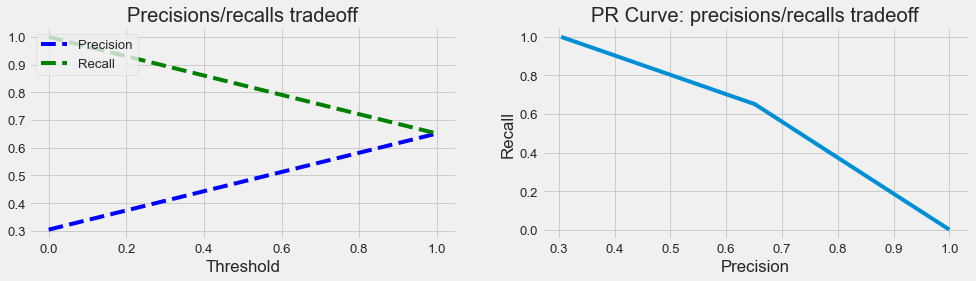

In [137]:
# Plot precision and recall graph 
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precisions/recalls tradeoff")

precisions, recalls, thresholds = precision_recall_curve(y_test, probit_predict(probit_model, X_test))

plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(2, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

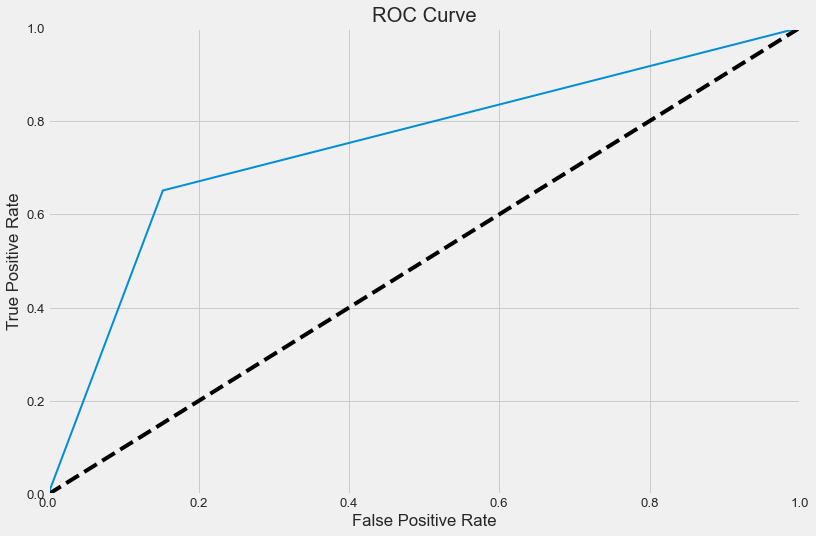

In [138]:
# Plot roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, probit_predict(probit_model, X_test))
plt.figure(figsize=(12,8))
plot_roc_curve(fpr, tpr)
plt.show()

In [139]:
# AUC score 
roc_auc_score(y_test, probit_predict(probit_model, X_test))

0.7493102089081592

<b>pro_1I_D_DR Model Overview</b><br>
- accuracy of 74.94% (train data) and 78.77% (test data)
- AUC score of 0.749
- Recall score around 0.6 to 1.0
- Precision score around 0.65 to 1.0

In general, the pro_1I_D_DR model is fairly accurate, because the accuracy scores are 74.94% for train data and 78.77% for test data. However, owing to the presence of false positive and false negative values, AUC score is at 0.749 with recall and precision scores around 0.6 to 1.0 and 0.65 to 1.0 respectively.

pro_1I_D_DR model is an acceptable and unbiased model, because the accuracy score for test data outshone its accuracy score.

# 12. Marketing Campaign Proposal

With the goal of shifting customers within Cluster 1 (Low Spenders) to Cluster 2, we see that the demographics that defines the customer in Cluster 1 are mainly those with Lower Income and Higher Number of Dependants.

Hence, to encourage those with Dependants to spend more, we will suggest to pilot a 3-month Family Promotion Programme that offers discounts to customers who visit the supermarket with their dependants. Even though the target of this campaign are customers with dependants, the effect will also impact both low and high income customers.

In the meantime, a market survey should also be performed to understand the needs of their dependents, in order, to tailor the right products for their dependents to the enhance effects of any further marketing campaigns targetting the dependants.


# 13. Conclusion

Even though the marketing campaign is not specific to any product product groups (Fruits/Wine etc), we expect that encouraging expenditure through targeting of the dependants would be beneficial for all product groups. Given the similar factors that impact the expenses, and the positive correlation values between the products, we believe that the increase in spending in any one of them will affect all other product groups as well.

Even for Wines, which are more closely linked to Income, we would expect to create an upward shift in the polynomial curve when general spending increases across all income groups, which ultimately fulfils our aim of increasing sales for our client.